# Business Understanding

## Describe the purpose of the data set you selected:

&emsp; This data is the collection of two datasets, one which is from a resort hotel and the other which is from a city hotel. The datasets have 40,060 observations and 79,330 obeservations respectively with both sharing 31 variables. The observations time range from July 1st 2015 until August 31st 2017. The data was orginally collected from "Hotel Booking Demand Datasets", written by Nuno Antonio, Ana Almeida, and Luis Nune for Data in Brief, Volume 22, February 2019. The data was consolidated from bookings, change logs, meal, transaction, and customer profiles.
<br>    
![title](dataset_origin_image.jpg)
<br>
   
&emsp; The primary purpose for the selection of this dataset is to research revenue management,such as the forecast of demand and prediction of problems such the likelihood of a hotel booking to be cancelled. Additionally this data could be used to generate models to see when is the ideal time to book a hotel room, or which days and for how long could you get the best rates. 
    
    

# Data Understanding

## Describe the meaning and type of data:
&emsp; The full description of the data can be found in https://www.sciencedirect.com/science/article/pii/S2352340918315191:


| Variable | Type | Description | Source/Engineering |
| --- | --- | --- | --- |
| ADR | Numeric | Average Daily Rate as defined by | BO, BL and TR / Calculated by dividing the sum of all lodging transactions by the total number of staying nights |
| Adults | Integer | Number of adults | BO and BL |
| Agent | Categorical | ID of the travel agency that made the bookinga | BO and BL |
| ArrivalDateDayOfMonth | Integer | Day of the month of the arrival date | BO and BL |
| ArrivalDateMonth | Categorical | Month of arrival date with 12 categories: “January” to “December”| BO and BL |
| ArrivalDateWeekNumber	| Integer | Week number of the arrival date | BO and BL |
| ArrivalDateYear | Integer | Year of arrival date | BO and BL |
| AssignedRoomType | Categorical | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons | BO and BL |
| Babies | Integer | Number of babies | BO and BL |
| BookingChanges | Integer | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation | BO and BL/Calculated by adding the number of unique iterations that change some of the booking attributes, namely: persons, arrival date, nights, reserved room type or meal |
| Children | Integer | Number of children | BO and BL/Sum of both payable and non-payable children |
| Company | Categorical | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons	BO and BL. |
| Country | Categorical | Country of origin. Categories are represented in the ISO 3155–3:2013 format [6] | BO, BL and NT |
| CustomerType | Categorical | Type of booking, assuming one of four categories: <br> Contract - when the booking has an allotment or other type of contract associated to it; <br> Group – when the booking is associated to a group; <br> Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; <br> Transient-party – when the booking is transient, but is associated to at least other transient booking <br> | BO and BL |
| DaysInWaitingList | Integer | Number of days the booking was in the waiting list before it was confirmed to the customer | BO/Calculated by subtracting the date the booking was confirmed to the customer from the date the booking entered on the PMS |
| DepositType | Categorical | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: <br> No Deposit – no deposit was made; <br> Non Refund – a deposit was made in the value of the total stay cost; <br> Refundable – a deposit was made with a value under the total cost of stay. | BO and TR/Value calculated based on the payments identified for the booking in the transaction (TR) table before the booking׳s arrival or cancellation date. |
| DistributionChannel | Categorical | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” | BO, BL and DC |
| IsCanceled | Categorical | Value indicating if the booking was canceled (1) or not (0) | BO |
| IsRepeatedGuest | Categorical | Value indicating if the booking name was from a repeated guest (1) or not (0) | BO, BL and C/ Variable created by verifying if a profile was associated with the booking customer. If so, and if the customer profile creation date was prior to the creation date for the booking on the PMS database it was assumed the booking was from a repeated guest |
| LeadTime | Integer | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date | BO and BL/ Subtraction of the entering date from the arrival date |
| MarketSegment | Categorical | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” | BO, BL and MS |
| Meal | Categorical | Type of meal booked. | Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package; <br> BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner) | BO, BL and ML |
| PreviousBookingsNotCanceled | Integer | Number of previous bookings not cancelled by the customer prior to the current booking | BO and BL / In case there was no customer profile associated with the booking, the value is set to 0. Otherwise, the value is the number of bookings with the same customer profile created before the current booking and not canceled. |
| PreviousCancellations | Integer | Number of previous bookings that were cancelled by the customer prior to the current booking | BO and BL/ In case there was no customer profile associated with the booking, the value is set to 0. Otherwise, the value is the number of bookings with the same customer profile created before the current booking and canceled. |
| RequiredCardParkingSpaces | Integer | Number of car parking spaces required by the customer | BO and BL |
| ReservationStatus | Categorical | Reservation last status, assuming one of three categories: <br> Canceled – booking was canceled by the customer; <br> Check-Out – customer has checked in but already departed; <br> No-Show – customer did not check-in and did inform the hotel of the reason why | BO |
| ReservationStatusDate | Date | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel | BO |
| ReservedRoomType | Categorical | Code of room type reserved. Code is presented instead of designation for anonymity reasons | BO and BL |
| StaysInWeekendNights | Integer | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel | BO and BL/ Calculated by counting the number of weekend nights from the total number of nights |
| StaysInWeekNights | Integer | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel | BO and BL/Calculated by counting the number of week nights from the total number of nights |
| TotalOfSpecialRequests | Integer | Number of special requests made by the customer (e.g. twin bed or high floor) | BO and BL/Sum of all special requests |
<br>


## Verify Data Quality

&emsp; Upon initial inspection of the 31 attributes 4 appear to have some missing data. However 3 additional attributes also appear to have missing data but instead of appearing as 'nan' they are labeled as 'Undefined'. Below is a list of all the attributes with missing values and the counts:

<ul>
<li>agent- 16340 </li>
<li>company- 112593</li>
<li>children- 4</li>
<li>country- 488</li>
<li>market_segment - 2</li> 
<li>meal - 1169</li>
<li>distribution_channel - 5 </li>
</ul>


&emsp; There's an association between the distribution channel type and the agent and company attributes. If the distribution channel is from a Traveling Agent or Tour Operator, then the agency company is supplied in the agent column. Similarly if the distribution channel is Corporate, then the company associated with the booking is populated under the company attribute. If the distribution is neither Corporate, TA or TO than both the agent and company attributes will be null. To simplify our data exploration we have decided to remove the agent and company attributes as they don't provide any additional information beyond what already is provided in the distribution channel. For the meal attribute during our data investigation we have found out that 'Undefined' and 'SC' are synonymous so we have decided to replace 'Undefined' with 'SC'. For the remainder they appear to have been ommitted accidentally and we have to decided to populate the missing values with the mode. 


Additionally, the following attributes were classified as objects, however they're categorical in nature so we have decided to encode each of these attributes with a corresponding number according to their alphabetical order:

<ul>
<li>hotel - ['City Hotel', 'Resort Hotel']</li>
<li>market_segment - ['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups',
       'Offline TA/TO', 'Online TA']</li>
<li>meal - ['BB', 'FB', 'HB', 'SC']</li>
<li>reservation_status - ['Canceled', 'Check-Out', 'No-Show']</li>
<li>distribution_channel - ['Corporate', 'Direct', 'GDS', 'TA/TO']</li>
<li>reserved_room_type - ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L', 'P']</li>
<li>assigned_room_type - ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'P']</li>
<li>deposit_type - ['No Deposit', 'Non Refund', 'Refundable']</li>
<li>country - [['ABW','AGO','AIA','ALB','AND', 'ARE', 'ARG', 'ARM',
 'ASM', 'ATA', 'ATF', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA',
 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BOL', 'BRA', 'BRB', 'BWA',
 'CAF', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'CN', 'COL', 'COM', 'CPV',
 'CRI', 'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM',
 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'FRO',
 'GAB', 'GBR', 'GEO', 'GGY', 'GHA', 'GIB', 'GLP', 'GNB', 'GRC', 'GTM', 'GUY',
 'HKG', 'HND', 'HRV', 'HUN', 'IDN', 'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL',
 'ISR', 'ITA', 'JAM', 'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KHM', 'KIR',
 'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBY', 'LCA', 'LIE', 'LKA', 'LTU', 'LUX',
 'LVA', 'MAC', 'MAR', 'MCO' 'MDG', 'MDV', 'MEX', 'MKD', 'MLI', 'MLT', 'MMR',
 'MNE', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'MYT', 'NAM', 'NCL', 'NGA', 'NIC',
 'NLD', 'NOR', 'NPL', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'PLW', 'POL',
 'PRI', 'PRT', 'PRY', 'PYF', 'QAT', 'ROU', 'RUS', 'RWA', 'SAU', 'SDN', 'SEN',
 'SGP', 'SLE', 'SLV', 'SMR', 'SRB', 'STP', 'SUR', 'SVK', 'SVN', 'SWE', 'SYC',
 'SYR', 'TGO', 'THA', 'TJK', 'TMP', 'TUN', 'TUR', 'TWN', 'TZA', 'UGA', 'UKR', 'UMI',
 'URY', 'USA', 'UZB', 'VEN', 'VGB', 'VNM', 'ZAF', 'ZMB', 'ZWE']]</li>
<li>customer_type - ['Contract', 'Group', 'Transient', 'Transient-Party']</li>
</ul>    


Lastly, for the arrival_date_month we decided to encode according to their correspoding month number in the gregorian calendar and construct two new columns that correspond to the generated timestamp from the concatenated arrival date and the reservation_status_date to help out with regression later on.





In [3]:
import pandas as pd
import numpy as np

hotel_bookings = pd.read_csv('hotel_bookings.csv') # read in the csv file

hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [2]:
hotel_bookings.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [3]:
hotel_bookings.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [4]:
hotel_bookings.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [5]:
hotel_bookings.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [6]:
hotel_bookings.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [7]:
hotel_bookings.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [8]:
hotel_bookings.reserved_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [9]:
hotel_bookings.assigned_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [10]:
hotel_bookings.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [11]:
hotel_bookings.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [12]:
hotel_bookings.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [13]:
hotel_bookings.loc[hotel_bookings['market_segment'] == 'Undefined']['market_segment'].count()

2

In [14]:
hotel_bookings.loc[hotel_bookings['meal'] == 'Undefined']['meal'].count()

1169

In [15]:
hotel_bookings.loc[hotel_bookings['distribution_channel'] == 'Undefined']['distribution_channel'].count()


5

In [16]:
hotel_bookings[['children','country','market_segment','meal','distribution_channel']].mode() 

,children,country,market_segment,meal,distribution_channel
0,0.0,PRT,Online TA,BB,TA/TO


In [4]:
import math
import numpy as np
hotel_bookings_transform = hotel_bookings
hotel_bookings_transform['children']= hotel_bookings_transform['children'].apply(lambda x: 0 if  math.isnan(x)  else x)
hotel_bookings_transform['country']= hotel_bookings_transform['country'].apply(lambda x: 'PRT' if  pd.isna(x)  else x)
hotel_bookings_transform['market_segment']= hotel_bookings_transform['market_segment'].apply(lambda x: 'Online TA' if  x == 'Undefined'  else x)
hotel_bookings_transform['meal']= hotel_bookings_transform['meal'].apply(lambda x: 'SC' if  x == 'Undefined'  else x)
hotel_bookings_transform['distribution_channel']= hotel_bookings_transform['distribution_channel'].apply(lambda x: 'TA/TO' if  x == 'Undefined'  else x)





In [29]:
hotel_bookings['country'].astype('category').cat.categories

Index(['ABW', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATA',
       ...
       'UMI', 'URY', 'USA', 'UZB', 'VEN', 'VGB', 'VNM', 'ZAF', 'ZMB', 'ZWE'],
      dtype='object', length=177)

In [19]:
hotel_bookings['hotel'].astype('category').cat.categories

Index(['City Hotel', 'Resort Hotel'], dtype='object')

In [20]:
hotel_bookings['market_segment'].astype('category').cat.categories

Index(['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups',
       'Offline TA/TO', 'Online TA'],
      dtype='object')

In [21]:
hotel_bookings['meal'].astype('category').cat.categories

Index(['BB', 'FB', 'HB', 'SC'], dtype='object')

In [22]:
hotel_bookings['reservation_status'].astype('category').cat.categories

Index(['Canceled', 'Check-Out', 'No-Show'], dtype='object')

In [23]:
hotel_bookings['distribution_channel'].astype('category').cat.categories

Index(['Corporate', 'Direct', 'GDS', 'TA/TO'], dtype='object')

In [24]:
hotel_bookings['reserved_room_type'].astype('category').cat.categories

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L', 'P'], dtype='object')

In [25]:
hotel_bookings['assigned_room_type'].astype('category').cat.categories

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'P'], dtype='object')

In [26]:
hotel_bookings['deposit_type'].astype('category').cat.categories

Index(['No Deposit', 'Non Refund', 'Refundable'], dtype='object')

In [27]:
hotel_bookings['customer_type'].astype('category').cat.categories

Index(['Contract', 'Group', 'Transient', 'Transient-Party'], dtype='object')

In [5]:
hotel_bookings_transform['hotel']=hotel_bookings_transform['hotel'].astype('category').cat.codes
hotel_bookings_transform['market_segment']=hotel_bookings_transform['market_segment'].astype('category').cat.codes
hotel_bookings_transform['meal']=hotel_bookings_transform['meal'].astype('category').cat.codes
hotel_bookings_transform['reservation_status']=hotel_bookings_transform['reservation_status'].astype('category').cat.codes
hotel_bookings_transform['distribution_channel']=hotel_bookings_transform['distribution_channel'].astype('category').cat.codes
hotel_bookings_transform['reserved_room_type']=hotel_bookings_transform['reserved_room_type'].astype('category').cat.codes
hotel_bookings_transform['assigned_room_type']=hotel_bookings_transform['assigned_room_type'].astype('category').cat.codes
hotel_bookings_transform['deposit_type']=hotel_bookings_transform['deposit_type'].astype('category').cat.codes
hotel_bookings_transform['customer_type']=hotel_bookings_transform['customer_type'].astype('category').cat.codes

In [6]:
hotel_bookings_transform= hotel_bookings_transform.drop(columns=['agent','company'])

In [30]:
hotel_bookings_transform

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,July,27,1,0,0,2,...,2,3,0,0,2,0.00,0,0,1,2015-07-01
1,1,0,737,2015,July,27,1,0,0,2,...,2,4,0,0,2,0.00,0,0,1,2015-07-01
2,1,0,7,2015,July,27,1,0,1,1,...,2,0,0,0,2,75.00,0,0,1,2015-07-02
3,1,0,13,2015,July,27,1,0,1,1,...,0,0,0,0,2,75.00,0,0,1,2015-07-02
4,1,0,14,2015,July,27,1,0,2,2,...,0,0,0,0,2,98.00,0,1,1,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,August,35,30,2,5,2,...,0,0,0,0,2,96.14,0,0,1,2017-09-06
119386,0,0,102,2017,August,35,31,2,5,3,...,4,0,0,0,2,225.43,0,2,1,2017-09-07
119387,0,0,34,2017,August,35,31,2,5,2,...,3,0,0,0,2,157.71,0,4,1,2017-09-07
119388,0,0,109,2017,August,35,31,2,5,2,...,0,0,0,0,2,104.40,0,0,1,2017-09-07


In [7]:
assign_month = {"arrival_date_month": {"January": 1, "February": 2, "March": 3, "April": 4,"May": 5,"June": 6,"July": 7,"August": 8,"September": 9,"October": 10,"November": 11,"December": 12}}
hotel_bookings_transform = hotel_bookings_transform.replace(assign_month)
hotel_bookings_transform.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,7,27,1,0,0,2,...,2,3,0,0,2,0.0,0,0,1,2015-07-01
1,1,0,737,2015,7,27,1,0,0,2,...,2,4,0,0,2,0.0,0,0,1,2015-07-01
2,1,0,7,2015,7,27,1,0,1,1,...,2,0,0,0,2,75.0,0,0,1,2015-07-02
3,1,0,13,2015,7,27,1,0,1,1,...,0,0,0,0,2,75.0,0,0,1,2015-07-02
4,1,0,14,2015,7,27,1,0,2,2,...,0,0,0,0,2,98.0,0,1,1,2015-07-03


In [8]:
#TODO: modify this code with hotel_bookings
hotel_bookings_transform=hotel_bookings_transform.assign(booking_date = hotel_bookings_transform["arrival_date_year"].astype(str) + '-' + 
hotel_bookings_transform["arrival_date_month"].astype(str) + '-' +hotel_bookings_transform["arrival_date_day_of_month"].astype(str))
hotel_bookings_transform['booking_date']=pd.to_datetime(hotel_bookings_transform.booking_date)
hotel_bookings_transform['booking_date']

0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: booking_date, Length: 119390, dtype: datetime64[ns]

In [33]:
hotel_bookings_transform.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [34]:
hotel_bookings.mode()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,0,0,2016,August,33,17,0,2,2,...,0,9.0,40.0,0,2,62.0,0,0,1,2015-10-21


In [35]:
hotel_bookings.loc[:,"agent"].mode()

0    9.0
dtype: float64

In [36]:
hotel_bookings.loc[:,"company"].mode()

0    40.0
dtype: float64

## Simple Stastics

&emsp; To evaluate the simple statistics we split the categorical and non categorical data. For the categorical data we explored the overall number of observations per category to find out the distribution. For the non-categorical data we explored the simple (Mean, STD, Min, Max, Percentile) by a simple describe. We used the result of this data in future visualizations. Lastly we wanted to see the total number of outliers for each of the non-categorical attributes, we decided to classify anything that was more than 3 standard deviations as an outlier below you'll see the result.

- Categorical Values:
    - hotel
    - market_segment
    - meal
    - reservation_status
    - distribution_channel
    - reserved_room_type
    - assigned_room_type
    - deposit_type
    - country 
    - customer_type

- Non-categorical:
    - lead_time                       
    - arrival_date_year               
    - arrival_date_month              
    - arrival_date_week_number        
    - stays_in_weekend_nights         
    - stays_in_week_nights            
    - adults                          
    - children                        
    - babies                          
    - previous_cancellations          
    - previous_bookings_not_canceled  
    - booking_changes                 
    - days_in_waiting_list            
    - adr                             
    - required_car_parking_spaces     
    - total_of_special_requests       
    - reservation_status_date         
    - booking_date   

In [30]:
hotel_bookings_transform_non_categorical = hotel_bookings_transform.drop(columns=['hotel','market_segment','meal','reservation_status','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','country','customer_type','is_canceled','is_repeated_guest','arrival_date_day_of_month'])
hotel_bookings_transform_non_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   lead_time                       119390 non-null  int64         
 1   arrival_date_year               119390 non-null  int64         
 2   arrival_date_month              119390 non-null  int64         
 3   arrival_date_week_number        119390 non-null  int64         
 4   stays_in_weekend_nights         119390 non-null  int64         
 5   stays_in_week_nights            119390 non-null  int64         
 6   adults                          119390 non-null  int64         
 7   children                        119390 non-null  float64       
 8   babies                          119390 non-null  int64         
 9   previous_cancellations          119390 non-null  int64         
 10  previous_bookings_not_canceled  119390 non-null  int64  

In [31]:
hotel_bookings_transform_categorical = hotel_bookings_transform[['hotel','market_segment','meal','reservation_status','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','country','customer_type','is_canceled','is_repeated_guest']]
hotel_bookings_transform_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   hotel                 119390 non-null  int8  
 1   market_segment        119390 non-null  int8  
 2   meal                  119390 non-null  int8  
 3   reservation_status    119390 non-null  int8  
 4   distribution_channel  119390 non-null  int8  
 5   reserved_room_type    119390 non-null  int8  
 6   assigned_room_type    119390 non-null  int8  
 7   deposit_type          119390 non-null  int8  
 8   country               119390 non-null  object
 9   customer_type         119390 non-null  int8  
 10  is_canceled           119390 non-null  int64 
 11  is_repeated_guest     119390 non-null  int64 
dtypes: int64(2), int8(9), object(1)
memory usage: 3.8+ MB


In [32]:
hotel_bookings_transform_non_categorical.describe()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,2016.156554,6.552483,27.165173,0.927599,2.500302,1.856403,0.103886,0.007949,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,106.863097,0.707476,3.090619,13.605138,0.998613,1.908286,0.579261,0.398555,0.097436,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,2016.000000,4.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,69.000000,2016.000000,7.000000,28.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,160.000000,2017.000000,9.000000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,2017.000000,12.000000,53.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [33]:
#Percentage by hotel
hotel_bookings_transform_categorical['hotel'].value_counts()/hotel_bookings_transform_categorical['hotel'].count()

0    0.664461
1    0.335539
Name: hotel, dtype: float64

In [34]:
#Percentage by hotel
hotel_bookings_transform_categorical['market_segment'].value_counts()/hotel_bookings_transform_categorical['market_segment'].count()

6    0.473063
5    0.202856
4    0.165935
3    0.105587
2    0.044350
1    0.006223
0    0.001985
Name: market_segment, dtype: float64

In [35]:
#Percentage by meal
hotel_bookings_transform_categorical['meal'].value_counts()/hotel_bookings_transform_categorical['meal'].count()

0    0.773180
2    0.121141
3    0.098995
1    0.006684
Name: meal, dtype: float64

In [36]:
#Percentage by reservation status
hotel_bookings_transform_categorical['reservation_status'].value_counts()/hotel_bookings_transform_categorical['reservation_status'].count()

1    0.629584
0    0.360307
2    0.010110
Name: reservation_status, dtype: float64

In [37]:
#Percentage by reservation status
hotel_bookings_transform_categorical['distribution_channel'].value_counts()/hotel_bookings_transform_categorical['distribution_channel'].count()

3    0.819792
1    0.122665
0    0.055926
2    0.001617
Name: distribution_channel, dtype: float64

In [38]:
#Percentage by reservation roomtype
hotel_bookings_transform_categorical['reserved_room_type'].value_counts()/hotel_bookings_transform_categorical['reserved_room_type'].count()

0    0.720278
3    0.160826
4    0.054737
5    0.024265
6    0.017539
1    0.009364
2    0.007806
7    0.005034
9    0.000101
8    0.000050
Name: reserved_room_type, dtype: float64

In [39]:
#Percentage by assigned_room_type
hotel_bookings_transform_categorical['assigned_room_type'].value_counts()/hotel_bookings_transform_categorical['assigned_room_type'].count()

0     0.620261
3     0.212095
4     0.065382
5     0.031418
6     0.021384
2     0.019893
1     0.018117
7     0.005964
8     0.003040
9     0.002337
11    0.000101
10    0.000008
Name: assigned_room_type, dtype: float64

In [40]:
#Percentage by deposit_type
hotel_bookings_transform_categorical['deposit_type'].value_counts()/hotel_bookings_transform_categorical['deposit_type'].count()

0    0.876464
1    0.122179
2    0.001357
Name: deposit_type, dtype: float64

In [41]:
#Percentange by country
hotel_bookings_transform_categorical['country'].value_counts()/hotel_bookings_transform_categorical['country'].count()

PRT    0.411073
GBR    0.101591
FRA    0.087235
ESP    0.071765
DEU    0.061035
         ...   
KIR    0.000008
CYM    0.000008
BFA    0.000008
GUY    0.000008
DJI    0.000008
Name: country, Length: 177, dtype: float64

In [42]:
#Percentage by customer_type
hotel_bookings_transform_categorical['customer_type'].value_counts()/hotel_bookings_transform_categorical['customer_type'].count()

2    0.750591
3    0.210436
0    0.034140
1    0.004833
Name: customer_type, dtype: float64

In [44]:
from scipy import stats
#outlier adr
adr = hotel_bookings_transform[(np.abs(stats.zscore(hotel_bookings_transform[['adr']])) > 3).all(axis=1)]['adr']
adr.describe()

count    1138.000000
mean      290.785571
std       154.793763
min       253.490000
25%       263.000000
50%       276.600000
75%       300.000000
max      5400.000000
Name: adr, dtype: float64

In [45]:
#outliers lead_time
hotel_bookings_transform[(np.abs(stats.zscore(hotel_bookings_transform[['lead_time']])) > 3).all(axis=1)]['lead_time'].describe()

count    1454.000000
mean      492.008253
std        57.785111
min       426.000000
25%       451.000000
50%       468.000000
75%       521.000000
max       737.000000
Name: lead_time, dtype: float64

In [46]:
#outliers adults
hotel_bookings_transform[(np.abs(stats.zscore(hotel_bookings_transform[['adults']])) > 3).all(axis=1)]['adults'].describe()

count    481.000000
mean       1.336798
std        5.220440
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       55.000000
Name: adults, dtype: float64

In [47]:
#outliers previous cancelation
hotel_bookings_transform[(np.abs(stats.zscore(hotel_bookings_transform[['previous_cancellations']])) > 3).all(axis=1)]['previous_cancellations'].describe()

count    317.000000
mean      12.990536
std        9.072313
min        3.000000
25%        4.000000
50%       11.000000
75%       24.000000
max       26.000000
Name: previous_cancellations, dtype: float64

In [48]:
#outliers booking_changes
hotel_bookings_transform[(np.abs(stats.zscore(hotel_bookings_transform[['booking_changes']])) > 3).all(axis=1)]['booking_changes'].describe()

count    1570.000000
mean        3.878344
std         1.803220
min         3.000000
25%         3.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: booking_changes, dtype: float64

In [49]:
#outliers days_in_waiting_list
hotel_bookings_transform[(np.abs(stats.zscore(hotel_bookings_transform[['days_in_waiting_list']])) > 3).all(axis=1)]['days_in_waiting_list'].describe()

count    1871.000000
mean      116.130412
std        73.437587
min        56.000000
25%        65.000000
50%        91.000000
75%       147.000000
max       391.000000
Name: days_in_waiting_list, dtype: float64

In [53]:
#outliers total of special requests
hotel_bookings_transform[(np.abs(stats.zscore(hotel_bookings_transform[['total_of_special_requests']])) > 3).all(axis=1)]['total_of_special_requests'].describe()

count    2877.000000
mean        3.145985
std         0.390555
min         3.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: total_of_special_requests, dtype: float64

In [52]:
#outliers required car parking spaces
hotel_bookings_transform[(np.abs(stats.zscore(hotel_bookings_transform[['required_car_parking_spaces']])) > 3).all(axis=1)]['required_car_parking_spaces'].describe()

count    7416.000000
mean        1.006472
std         0.136268
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         8.000000
Name: required_car_parking_spaces, dtype: float64

In [60]:
## import statsmodels.api as sm

hotel_bookings['hotel'] = hotel_bookings['hotel'].astype('category')
hotel_bookings['arrival_date_month'] = hotel_bookings['arrival_date_month'].astype('category')

Xtrain = hotel_bookings[['lead_time','arrival_date_year','arrival_date_month','arrival_date_week_number','stays_in_weekend_nights','stays_in_week_nights']]

Ytrain = hotel_bookings[['is_canceled']]

#hotel, arrival_date_month change to category
#replace nans of children


# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 119390 entries, 0 to 119389
# Data columns (total 32 columns):
#  #   Column                          Non-Null Count   Dtype  
# ---  ------                          --------------   -----  
#  0   hotel                           119390 non-null  object 
#  1   is_canceled                     119390 non-null  int64  
#  2   lead_time                       119390 non-null  int64  
#  3   arrival_date_year               119390 non-null  int64  
#  4   arrival_date_month              119390 non-null  object 
#  5   arrival_date_week_number        119390 non-null  int64  
#  6   arrival_date_day_of_month       119390 non-null  int64  
#  7   stays_in_weekend_nights         119390 non-null  int64  
#  8   stays_in_week_nights            119390 non-null  int64  
#  9   adults                          119390 non-null  int64  
#  10  children                        119386 non-null  float64
#  11  babies                          119390 non-null  int64  
#  12  meal                            119390 non-null  object 
#  13  country                         118902 non-null  object 
#  14  market_segment                  119390 non-null  object 
#  15  distribution_channel            119390 non-null  object 
#  16  is_repeated_guest               119390 non-null  int64  
#  17  previous_cancellations          119390 non-null  int64  
#  18  previous_bookings_not_canceled  119390 non-null  int64  
#  19  reserved_room_type              119390 non-null  object 
#  20  assigned_room_type              119390 non-null  object 
#  21  booking_changes                 119390 non-null  int64  
#  22  deposit_type                    119390 non-null  object 
#  23  agent                           103050 non-null  float64
#  24  company                         6797 non-null    float64
#  25  days_in_waiting_list            119390 non-null  int64  
#  26  customer_type                   119390 non-null  object 
#  27  adr                             119390 non-null  float64
#  28  required_car_parking_spaces     119390 non-null  int64  
#  29  total_of_special_requests       119390 non-null  int64  
#  30  reservation_status              119390 non-null  object 
#  31  reservation_status_date         119390 non-null  object 
# dtypes: float64(4), int64(16), object(12)
# memory usage: 29.1+ MB

#hotel encode
#arrival_date_month
#customer type encoded
#reservation_status encoded
#reservation_status_date 

#replace agent with binary value
#replace company with binary value



log_reg = sm.Logit(hotel_bookings['is_canceled'], sm.add_constant(hotel_bookings[['arrival_date_year']+['lead_time']
                                                                                 +['arrival_date_week_number']
                                                                                 +['stays_in_weekend_nights']
                                                                                 +['arrival_date_day_of_month']
                                                                                 +['stays_in_week_nights']
                                                                                 +['adults']+['babies']
                                                                                 +['is_repeated_guest']
                                                                                 +['previous_cancellations']
                                                                                 +['previous_bookings_not_canceled']
                                                                                 +['booking_changes']
                                                                                +['days_in_waiting_list']
                                                                                 +['adr']
                                                                                 +['required_car_parking_spaces']
                                                                                 +['total_of_special_requests']
                                                                                ])).fit()

log_reg.summary2()
#hotel_bookings.info()


#log_reg.aic







NameError: name 'sm' is not defined

In [61]:
log_reg = sm.Logit(hotel_bookings['is_canceled'], sm.add_constant(hotel_bookings[['arrival_date_year']+['lead_time']
                                                                                 +['arrival_date_week_number']
                                                                                 +['stays_in_weekend_nights']
                                                                                 +['arrival_date_day_of_month']
                                                                                 +['stays_in_week_nights']
                                                                                 +['adults']+['babies']
                                                                                 +['is_repeated_guest']
                                                                                 +['previous_cancellations']
                                                                                 +['previous_bookings_not_canceled']
                                                                                 +['booking_changes']
                                                                                +['days_in_waiting_list']
                                                                                 +['adr']
#                                                                                  +['required_car_parking_spaces']
                                                                                 +['total_of_special_requests']
                                                                                ])).fit()
log_reg.aic
log_reg.summary2()



NameError: name 'sm' is not defined

In [62]:

hotel_bookings['hotel'] = hotel_bookings['hotel'].astype('category')
#hotel_bookings['arrival_date_month'] = hotel_bookings['arrival_date_month'].astype('category')

hotel_bookings['hotel']  = hotel_bookings['hotel'].cat.codes




In [63]:
#hotel_bookings['arrival_date_month'].cat.categories
hotel_bookings['agent']

0           NaN
1           NaN
2           NaN
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119390, dtype: float64

In [64]:
import math
hotel_bookings['agent']
x = math.nan
if math.isnan(x) :
    print("true")
else :
    print("false")

hotel_bookings['agent']= hotel_bookings['agent'].apply(lambda x: False if math.isnan(x) else True)


true


In [65]:
hotel_bookings['agent']

0         False
1         False
2         False
3          True
4          True
          ...  
119385     True
119386     True
119387     True
119388     True
119389     True
Name: agent, Length: 119390, dtype: bool

In [66]:
hotel_bookings['company']= hotel_bookings['company'].apply(lambda x: False if math.isnan(x) else True)

In [67]:
hotel_bookings['company']

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Name: company, Length: 119390, dtype: bool

In [68]:

hotel_bookings['agent'] = hotel_bookings['agent'].astype('category').cat.codes
hotel_bookings['agent']

0         0
1         0
2         0
3         1
4         1
         ..
119385    1
119386    1
119387    1
119388    1
119389    1
Name: agent, Length: 119390, dtype: int8

In [69]:
hotel_bookings['company'] = hotel_bookings['company'].astype('category').cat.codes
hotel_bookings['company']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: company, Length: 119390, dtype: int8

In [70]:
hotel_bookings['market_segment']= hotel_bookings['market_segment'].astype('category').cat.codes

In [71]:
hotel_bookings['market_segment']

0         3
1         3
2         3
3         2
4         6
         ..
119385    5
119386    6
119387    6
119388    6
119389    6
Name: market_segment, Length: 119390, dtype: int8

In [72]:
hotel_bookings['meal']= hotel_bookings['meal'].astype('category').cat.codes
hotel_bookings['meal']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    2
Name: meal, Length: 119390, dtype: int8

In [73]:
hotel_bookings['hotel']

0         1
1         1
2         1
3         1
4         1
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: hotel, Length: 119390, dtype: int8

# Data Visualization and Attribute Relationships

### ADR and Cancellation

&emsp; One of the questions we wanted to get answers from this dataset is what are the predictors for a booking cancellation. To start we wanted see if the Average Daily Rate (ADR) for a booking was a factor in cancelling a reservation. We decided to first break the reservations for each room into quartiles based on their ADR then look at the percentile that were cancelled by ADR quartile. Below you'll see the description of the labels we used to indicate each quartile:  


Very Cheap- First Quartile
Cheap- Second Quartile
Expensive- Third Quartile
Very Expensive- Fourth Quartile



transform contious variables to categorical variables. We can see that as price increases the number of cancellation increase as well, but there are not much differences on cancellation between 'expensive' and 'very expensive' group. Number of non-cancellation decreases as the prices increases.


In [28]:
from scipy import stats
hotel_bookings_transform.adr.describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

Text(0.5, 1.0, 'Percentage of cancellation by ADR Group')

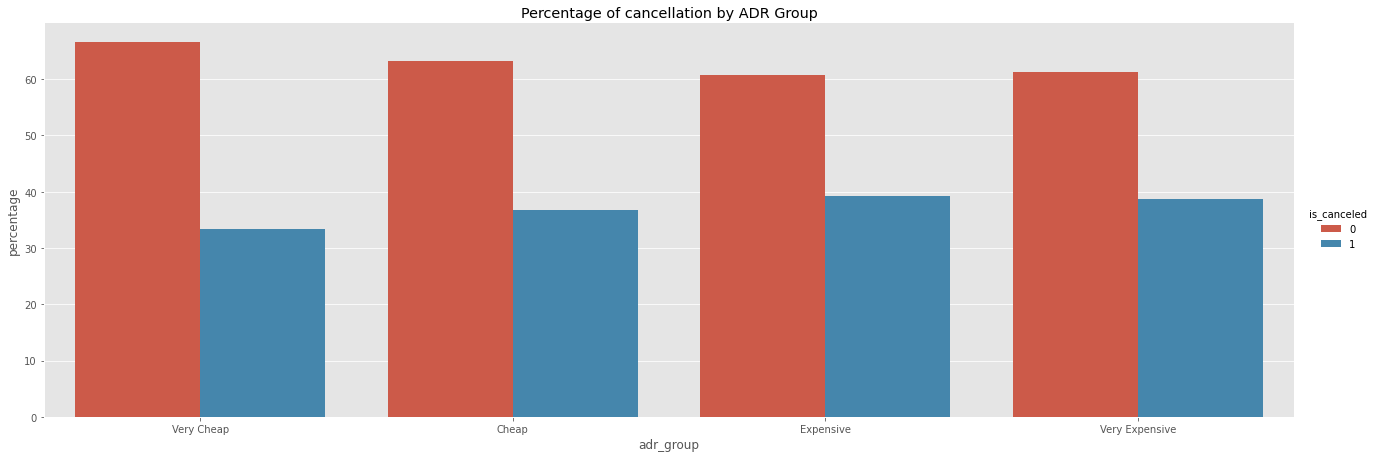

In [188]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

hotel_bookings_transform['adr_group'] = pd.cut(hotel_bookings_transform.adr,
                     bins=[-1, 69, 94, 126, 5400],
                     labels=["Very Cheap", "Cheap", "Expensive", "Very Expensive"])


(hotel_bookings_transform
.groupby('adr_group')['is_canceled']
.value_counts(normalize=True)
.mul(100)
.rename('percentage')
.reset_index()
.pipe((sns.catplot,'data'), x='adr_group',y='percentage',hue='is_canceled',kind='bar', height=6, aspect=3))
plt.title("Percentage of cancellation by ADR Group")

This is bar chart displaying number of cancellation by ADR Group. We divided up ADR by its quartiles groups to transform contious variables to categorical variables. We can see that as price increases the number of cancellation increase as well, but there are not much differences on cancellation between 'expensive' and 'very expensive' group. Number of non-cancellation decreases as the prices increases.

### Room Type Analysis

&emsp; We compare room types with ADR and found out room types 5-7 (F, G, H) have most expensive rate in average. Also we look for the counts of the rooms by adr group, and after Room type D it tends to have more expensive rates. From these charts, we can assume that as room types category increases it is a better room. 

Text(0.5, 1.0, 'Average ADR by Assigned Room type')

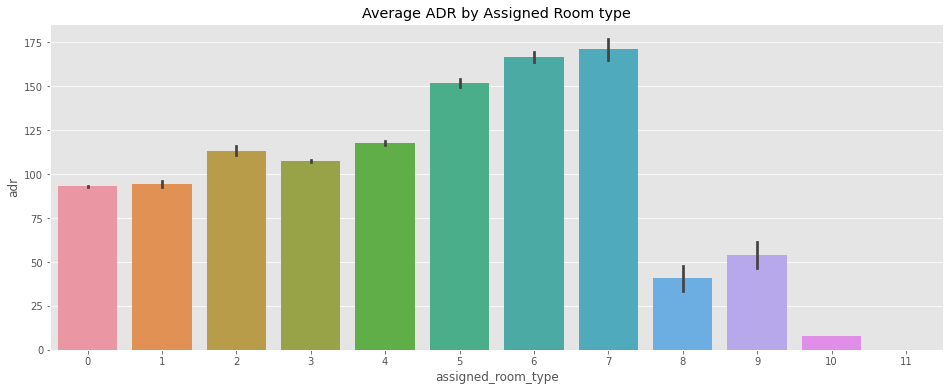

In [82]:
plt.figure(figsize=(16,6))
sns.barplot(data=hotel_bookings_transform, x='assigned_room_type', y="adr", estimator=mean)
plt.title("Average ADR by Assigned Room type")

Text(0.5, 1.0, 'Counts of ADR group by Assigned Room type')

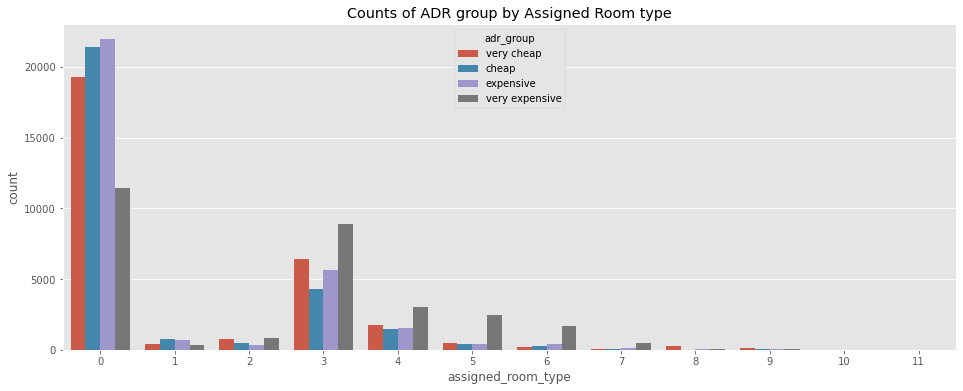

In [184]:
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings_transform, x="assigned_room_type", hue="adr_group")
plt.title("Counts of ADR group by Assigned Room type")

Text(0.5, 1.0, 'Percentage of ADR group by Assigned Room type')

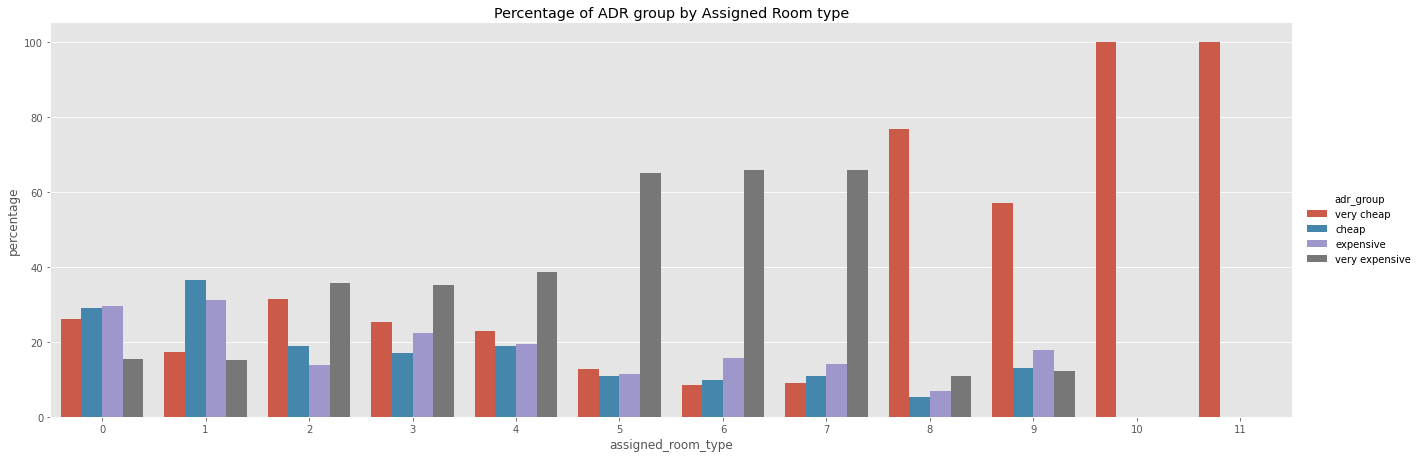

In [185]:
(hotel_bookings_transform
.groupby('assigned_room_type')['adr_group']
.value_counts(normalize=True)
.mul(100)
.rename('percentage')
.reset_index()
.pipe((sns.catplot,'data'), x='assigned_room_type',y='percentage',hue='adr_group',kind='bar', height=6, aspect=3))
plt.title("Percentage of ADR group by Assigned Room type")

Text(0.5, 1.0, 'Average ADR by Reserved Room type')

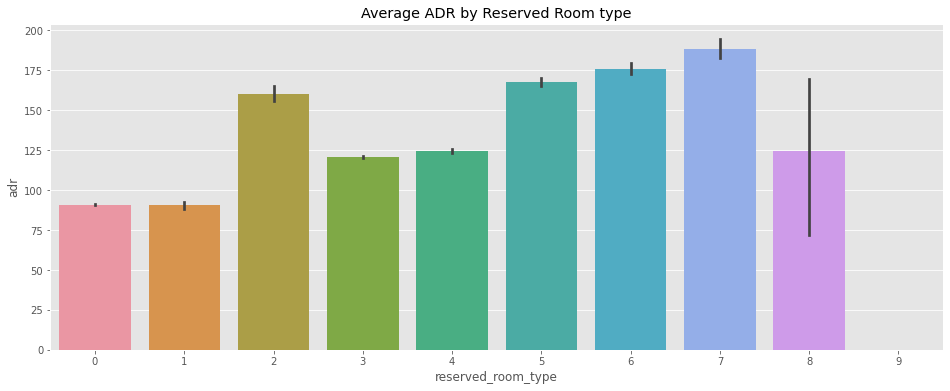

In [113]:
plt.figure(figsize=(16,6))
sns.barplot(data=hotel_bookings_transform, x='reserved_room_type', y="adr", estimator=mean)
plt.title("Average ADR by Reserved Room type")

Text(0.5, 1.0, 'Counts of ADR group by Reserved Room type')

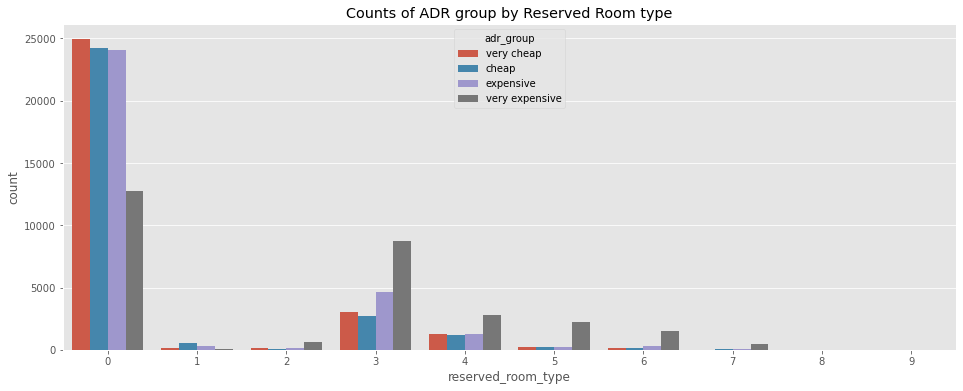

In [186]:
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings_transform, x="reserved_room_type", hue="adr_group")
plt.title("Counts of ADR group by Reserved Room type")

Text(0.5, 1.0, 'Percentage of ADR group by Reserved Room type')

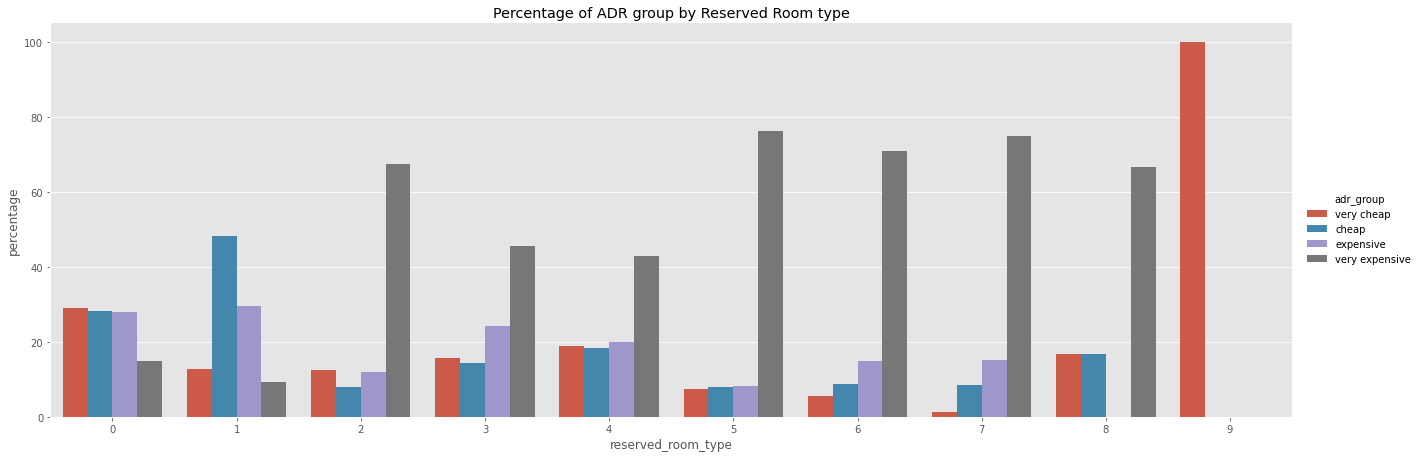

In [187]:
(hotel_bookings_transform
.groupby('reserved_room_type')['adr_group']
.value_counts(normalize=True)
.mul(100)
.rename('percentage')
.reset_index()
.pipe((sns.catplot,'data'), x='reserved_room_type',y='percentage',hue='adr_group',kind='bar', height=6, aspect=3))
plt.title("Percentage of ADR group by Reserved Room type")

### Adults/Children/Babies Analysis

Text(0.5, 1.0, 'Counts of ADR group by number of adult guests')

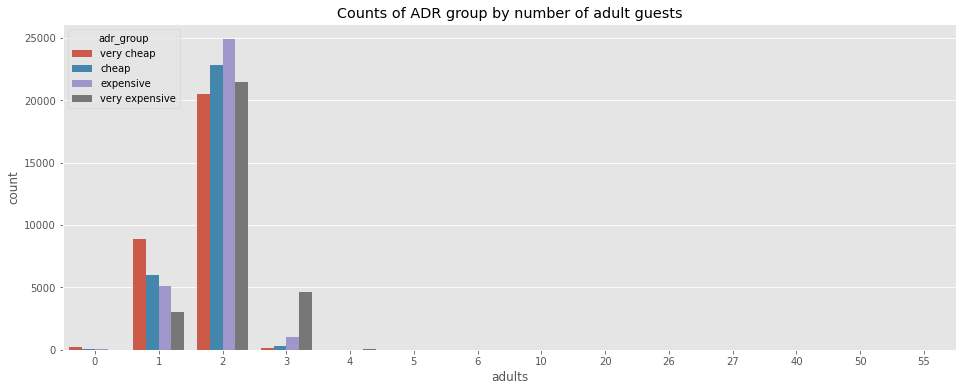

In [180]:
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings_transform, x="adults", hue="adr_group")
plt.title("Counts of ADR group by number of adult guests")

Text(0.5, 1.0, 'Percentage of ADR group by number of adult guests')

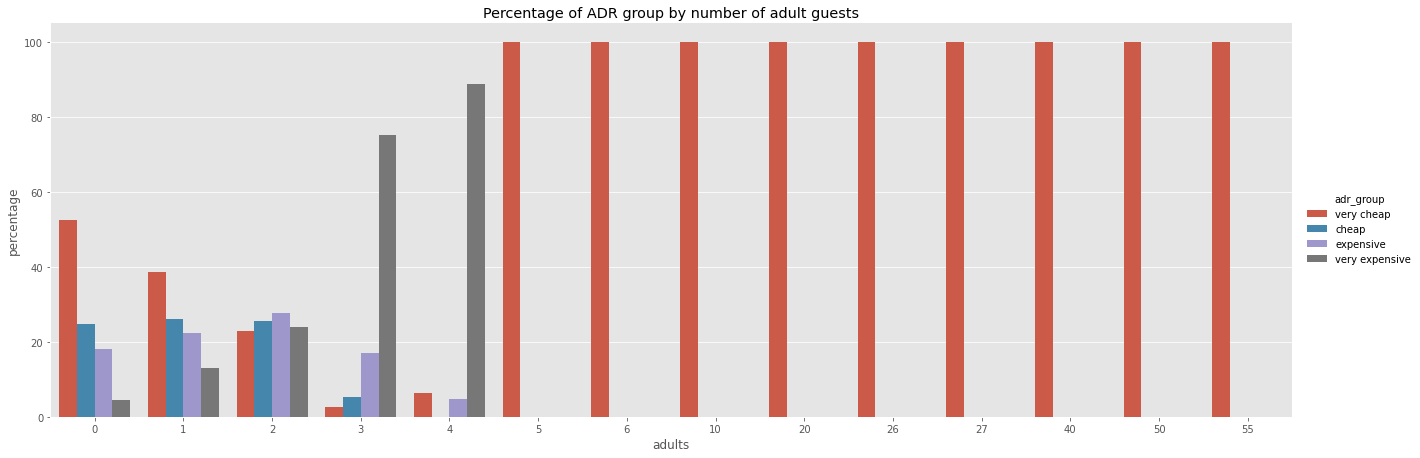

In [181]:
(hotel_bookings_transform
.groupby('adults')['adr_group']
.value_counts(normalize=True)
.mul(100)
.rename('percentage')
.reset_index()
.pipe((sns.catplot,'data'), x='adults',y='percentage',hue='adr_group',kind='bar', height=6, aspect=3))
plt.title("Percentage of ADR group by number of adult guests")

Text(0.5, 1.0, 'Counts of Customer Types of adult guests')

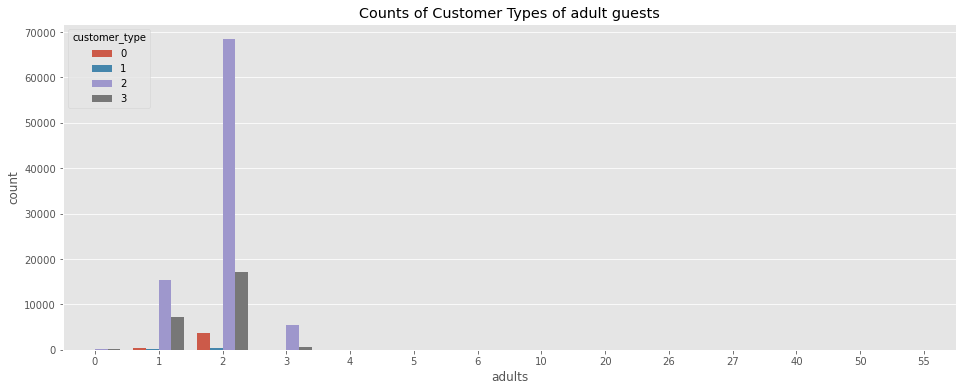

In [182]:
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings_transform, x="adults", hue="customer_type")
plt.title("Counts of Customer Types of adult guests")

Text(0.5, 1.0, 'Percentage of Customer Types of adult guests')

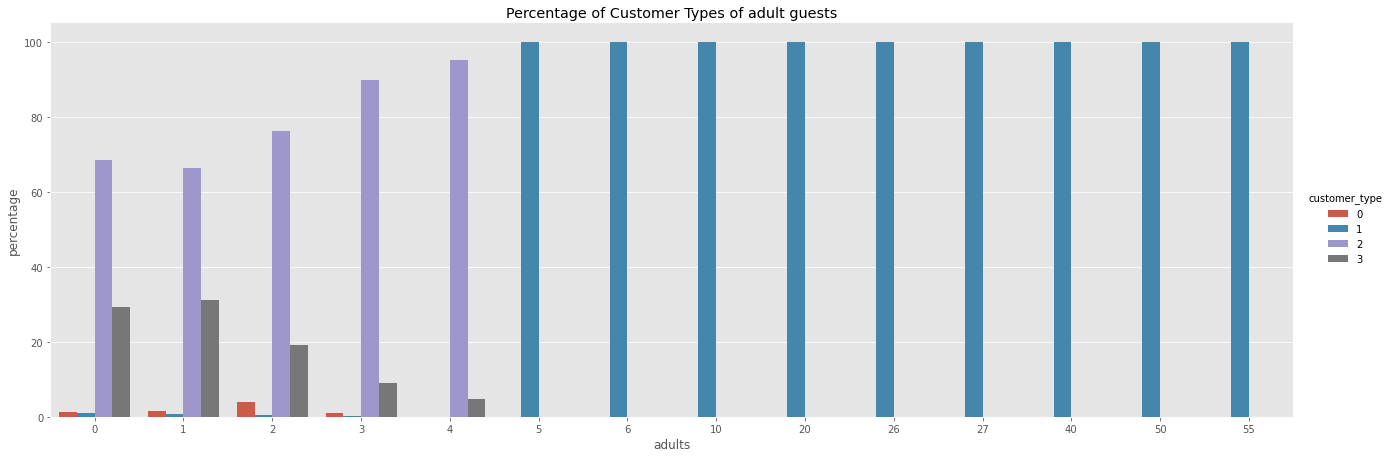

In [183]:
(hotel_bookings_transform
.groupby('adults')['customer_type']
.value_counts(normalize=True)
.mul(100)
.rename('percentage')
.reset_index()
.pipe((sns.catplot,'data'), x='adults',y='percentage',hue='customer_type',kind='bar', height=6, aspect=3))
plt.title("Percentage of Customer Types of adult guests")

Text(0.5, 1.0, 'Counts of ADR group by number of child guests')

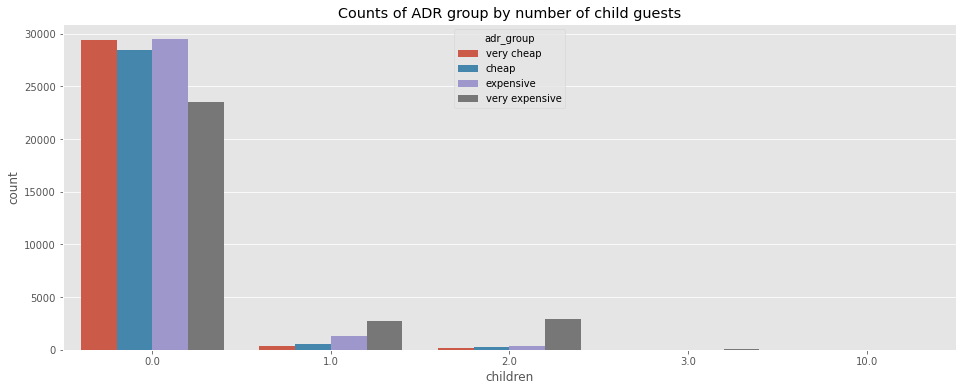

In [178]:
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings_transform, x="children", hue="adr_group")
plt.title("Counts of ADR group by number of child guests")

Text(0.5, 1.0, 'Percentage of ADR group by number of child guests')

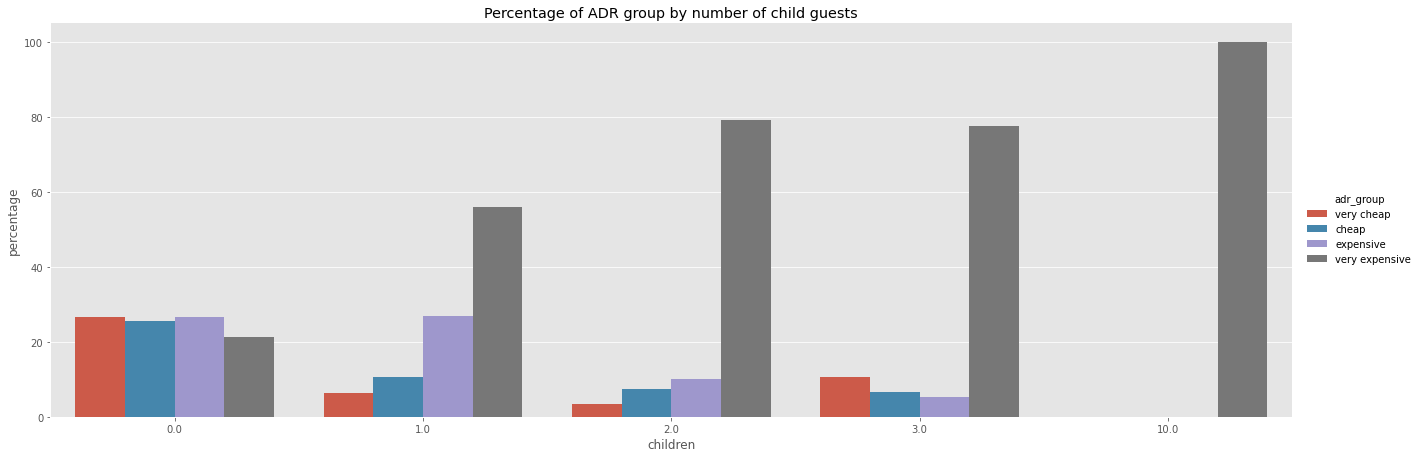

In [179]:
(hotel_bookings_transform
.groupby('children')['adr_group']
.value_counts(normalize=True)
.mul(100)
.rename('percentage')
.reset_index()
.pipe((sns.catplot,'data'), x='children',y='percentage',hue='adr_group',kind='bar', height=6, aspect=3))
plt.title("Percentage of ADR group by number of child guests")

Text(0.5, 1.0, 'Children vs Assigned Room Type')

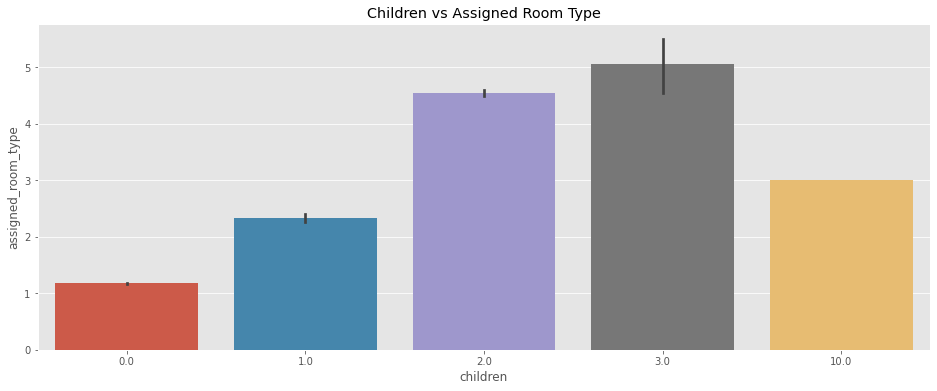

In [123]:
plt.figure(figsize=(16,6))
sns.barplot(data=hotel_bookings_transform, x="children", y="assigned_room_type")
plt.title("Children vs Assigned Room Type")

Text(0.5, 1.0, 'Count of ADR group by number of baby guests')

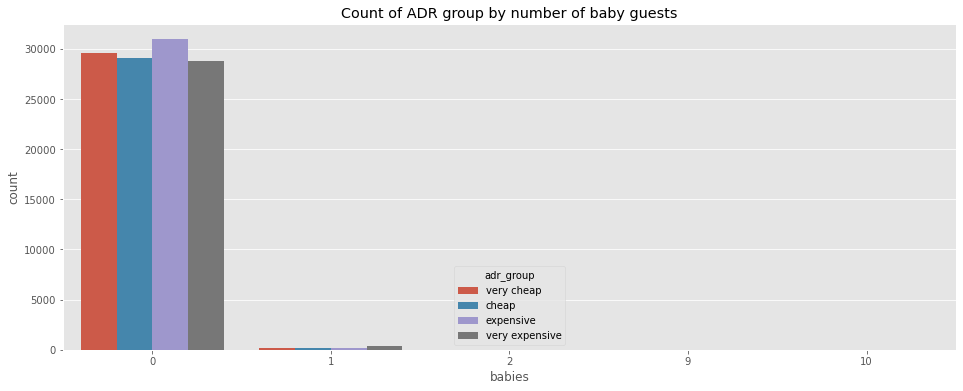

In [176]:
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings_transform, x="babies", hue="adr_group")
plt.title("Count of ADR group by number of baby guests")

Text(0.5, 1.0, 'Percentage of ADR group by number of baby guests')

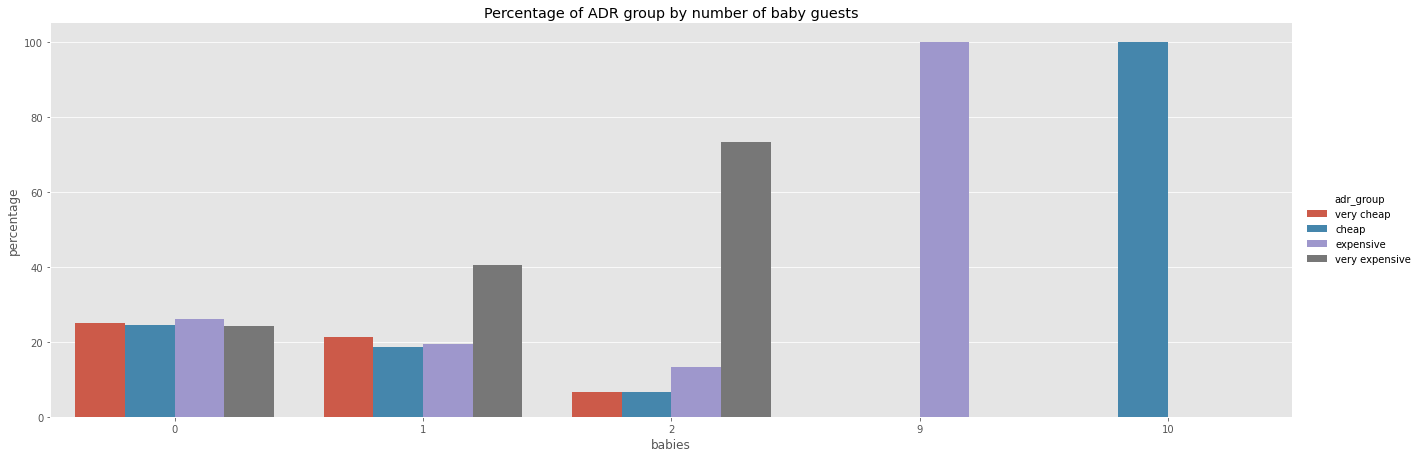

In [177]:
(hotel_bookings_transform
.groupby('babies')['adr_group']
.value_counts(normalize=True)
.mul(100)
.rename('percentage')
.reset_index()
.pipe((sns.catplot,'data'), x='babies',y='percentage',hue='adr_group',kind='bar', height=6, aspect=3))
plt.title("Percentage of ADR group by number of baby guests")

Text(0.5, 1.0, 'Counts of ADR group by number of total guests')

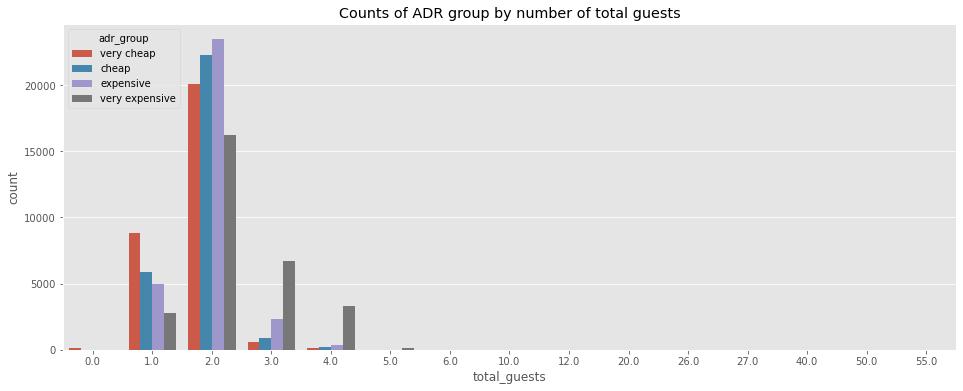

In [174]:
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings_transform, x="total_guests", hue="adr_group")
plt.title("Counts of ADR group by number of total guests")

Text(0.5, 1.0, 'Percentage of ADR group by number of total guests')

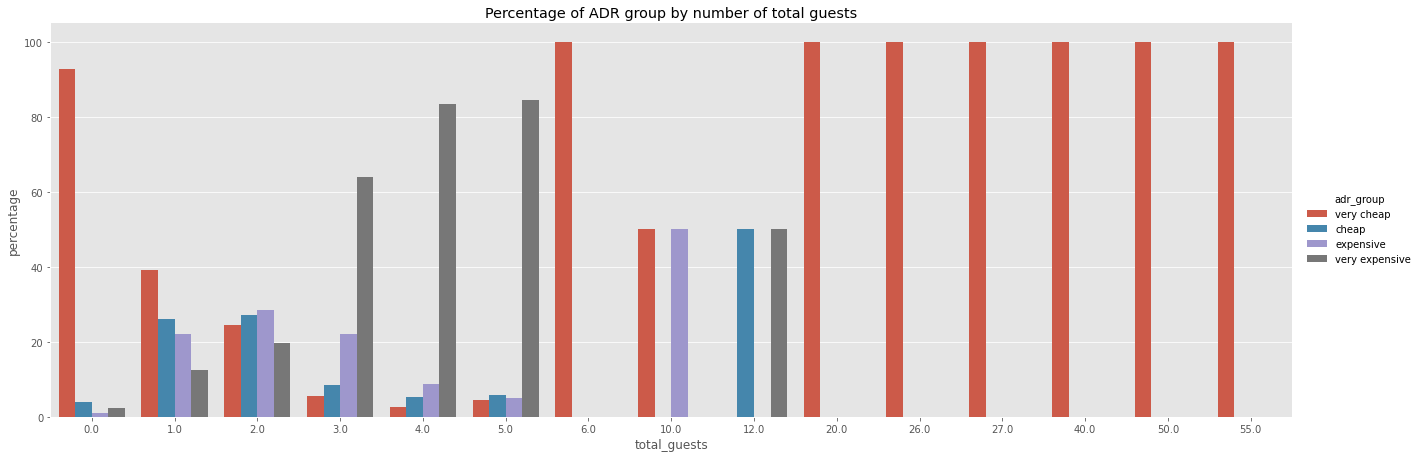

In [175]:
hotel_bookings_transform["total_guests"] = hotel_bookings_transform.adults + hotel_bookings_transform.children + hotel_bookings_transform.babies
(hotel_bookings_transform
.groupby('total_guests')['adr_group']
.value_counts(normalize=True)
.mul(100)
.rename('percentage')
.reset_index()
.pipe((sns.catplot,'data'), x='total_guests',y='percentage',hue='adr_group',kind='bar', height=6, aspect=3))
plt.title("Percentage of ADR group by number of total guests")

Text(0.5, 1.0, 'Total Guests vs Assigned Room Type')

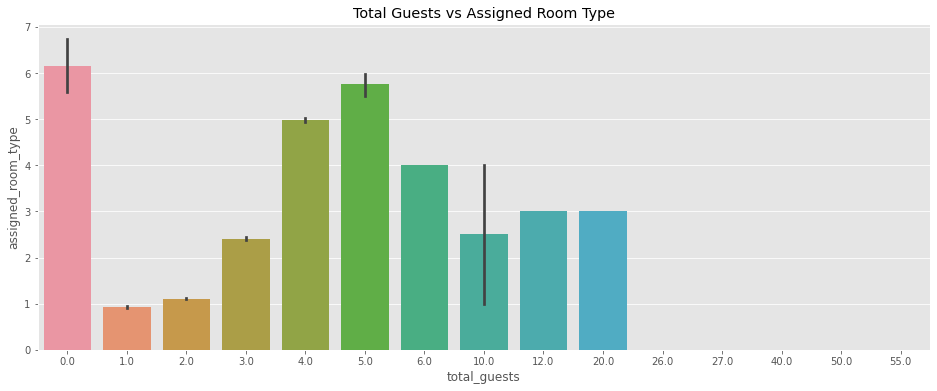

In [121]:
plt.figure(figsize=(16,6))
sns.barplot(data=hotel_bookings_transform, x="total_guests", y="assigned_room_type")
plt.title("Total Guests vs Assigned Room Type")

We also compare the number of guests with ADR for adults, children, and babies. We combined three attributes to create new feature, called total_guests. When there are only one guest, there are large number of booking with cheaper rates. We can assume that the when there are less than 3 guests, they will book for cheaper room, such as A. From the chart of "Total Guests vs Assigned Room Type", we can confirm our assumption. When there are more than 3 people, their booking prices are getting expensive and their assigned room also gets better.
When guests book hotel with children or babies, they tends to have higher adr. This might be due to seasonality that they booked during busy season or booked bigger rooms.

### Booking Date Analysis

Text(0.5, 1.0, 'Average ADR over years')

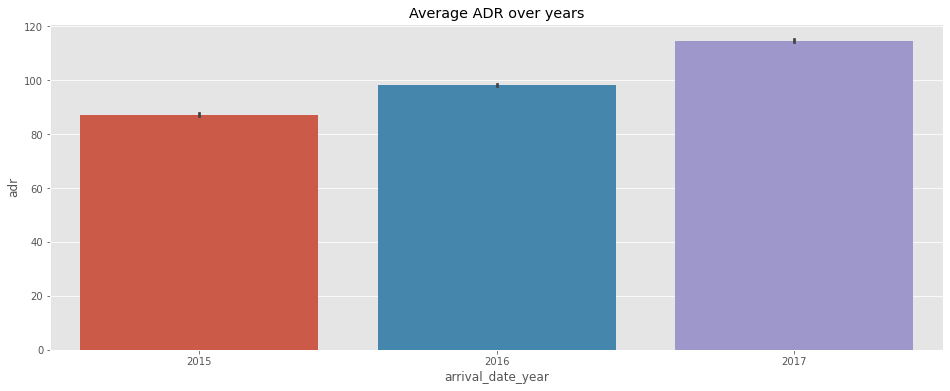

In [91]:
plt.figure(figsize=(16, 6))
sns.barplot(data=hotel_bookings_transform, x='arrival_date_year', y="adr", estimator=mean)
plt.title("Average ADR over years")

Text(0.5, 1.0, 'Average ADR over years of Cancellation')

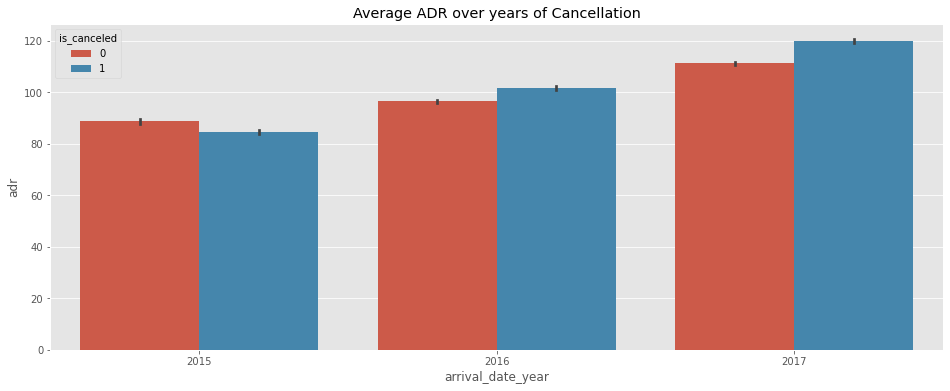

In [92]:
plt.figure(figsize=(16, 6))
sns.barplot(data=hotel_bookings_transform, x='arrival_date_year', y="adr", estimator=mean, hue="is_canceled")
plt.title("Average ADR over years of Cancellation")

We then compare booking price and cancellation rate over time. These are bar charts of adr and cancellation for each years. Over the year, the average booking prices increases and number of cancellation increases as well.

Text(0.5, 1.0, 'Average ADR for each Months')

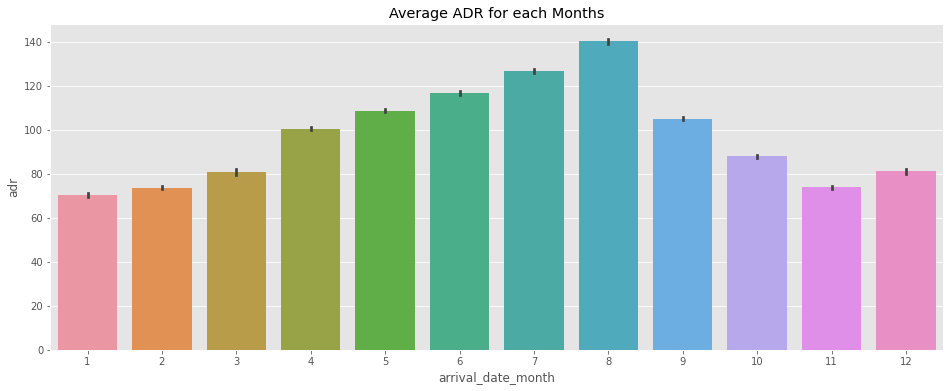

In [94]:
plt.figure(figsize=(16, 6))
sns.barplot(data=hotel_bookings_transform, x='arrival_date_month', y="adr", estimator=mean)
plt.title("Average ADR for each Months")

Text(0.5, 1.0, 'Counts of cancellation for each months')

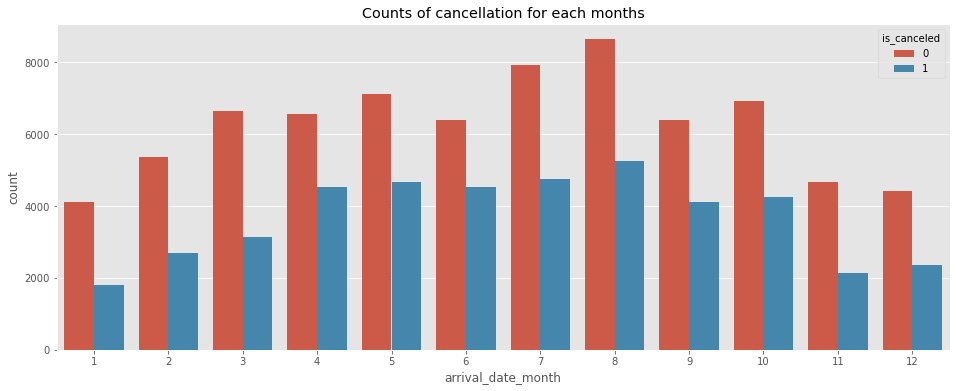

In [173]:
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings_transform, x="arrival_date_month", hue="is_canceled")
plt.title("Counts of cancellation for each months")

Text(0.5, 1.0, 'Percentage of cancellation for each months')

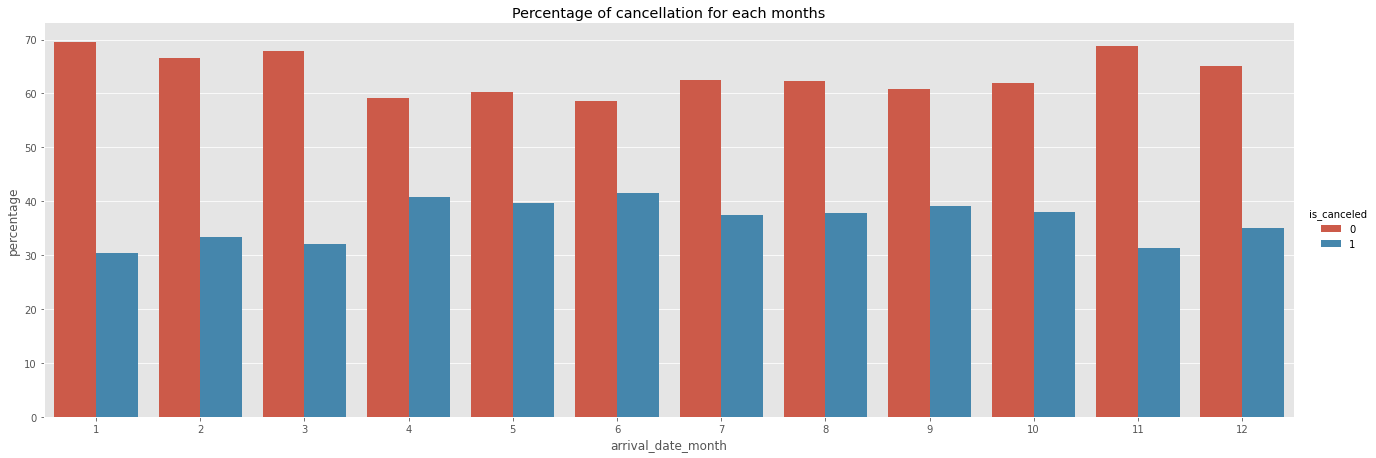

In [172]:
(hotel_bookings_transform
.groupby('arrival_date_month')['is_canceled']
.value_counts(normalize=True)
.mul(100)
.rename('percentage')
.reset_index()
.pipe((sns.catplot,'data'), x='arrival_date_month',y='percentage',hue='is_canceled',kind='bar', height=6, aspect=3))
plt.title("Percentage of cancellation for each months")

To get more insigh for each year, we ran the visual analysis on each months. From June to August, the average booking prices are much higher than the other months. We can assume this is peak season, and hotel tends to increase their booking prices for that season. From the "Counts of cancellation for each months" chart, there are higher number of booking as well on the peak season.

C:\Users\Chris\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Average ADR of every months for each year')

<Figure size 1152x432 with 0 Axes>

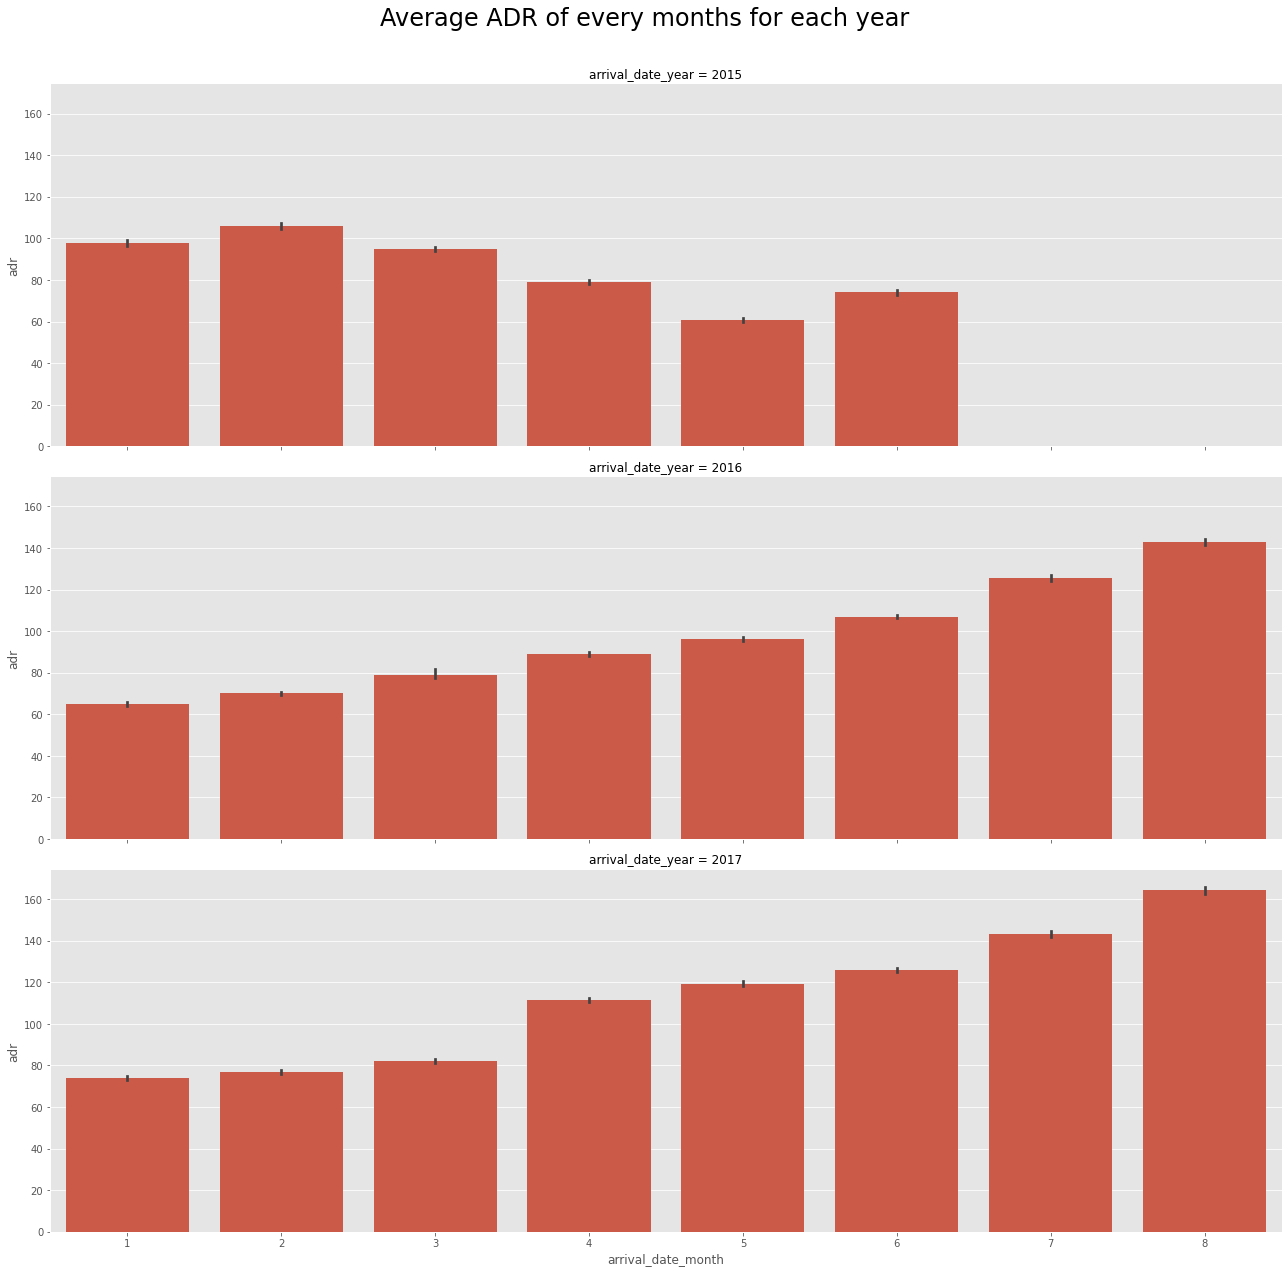

In [130]:
fig = plt.figure(figsize=(16, 6))
g = sns.FacetGrid(hotel_bookings_transform, row="arrival_date_year", height=6, aspect=3)
g.map(sns.barplot, "arrival_date_month", "adr")
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Average ADR of every months for each year", fontsize=24)

C:\Users\Chris\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Duration of Stays from 2015 to 2017')

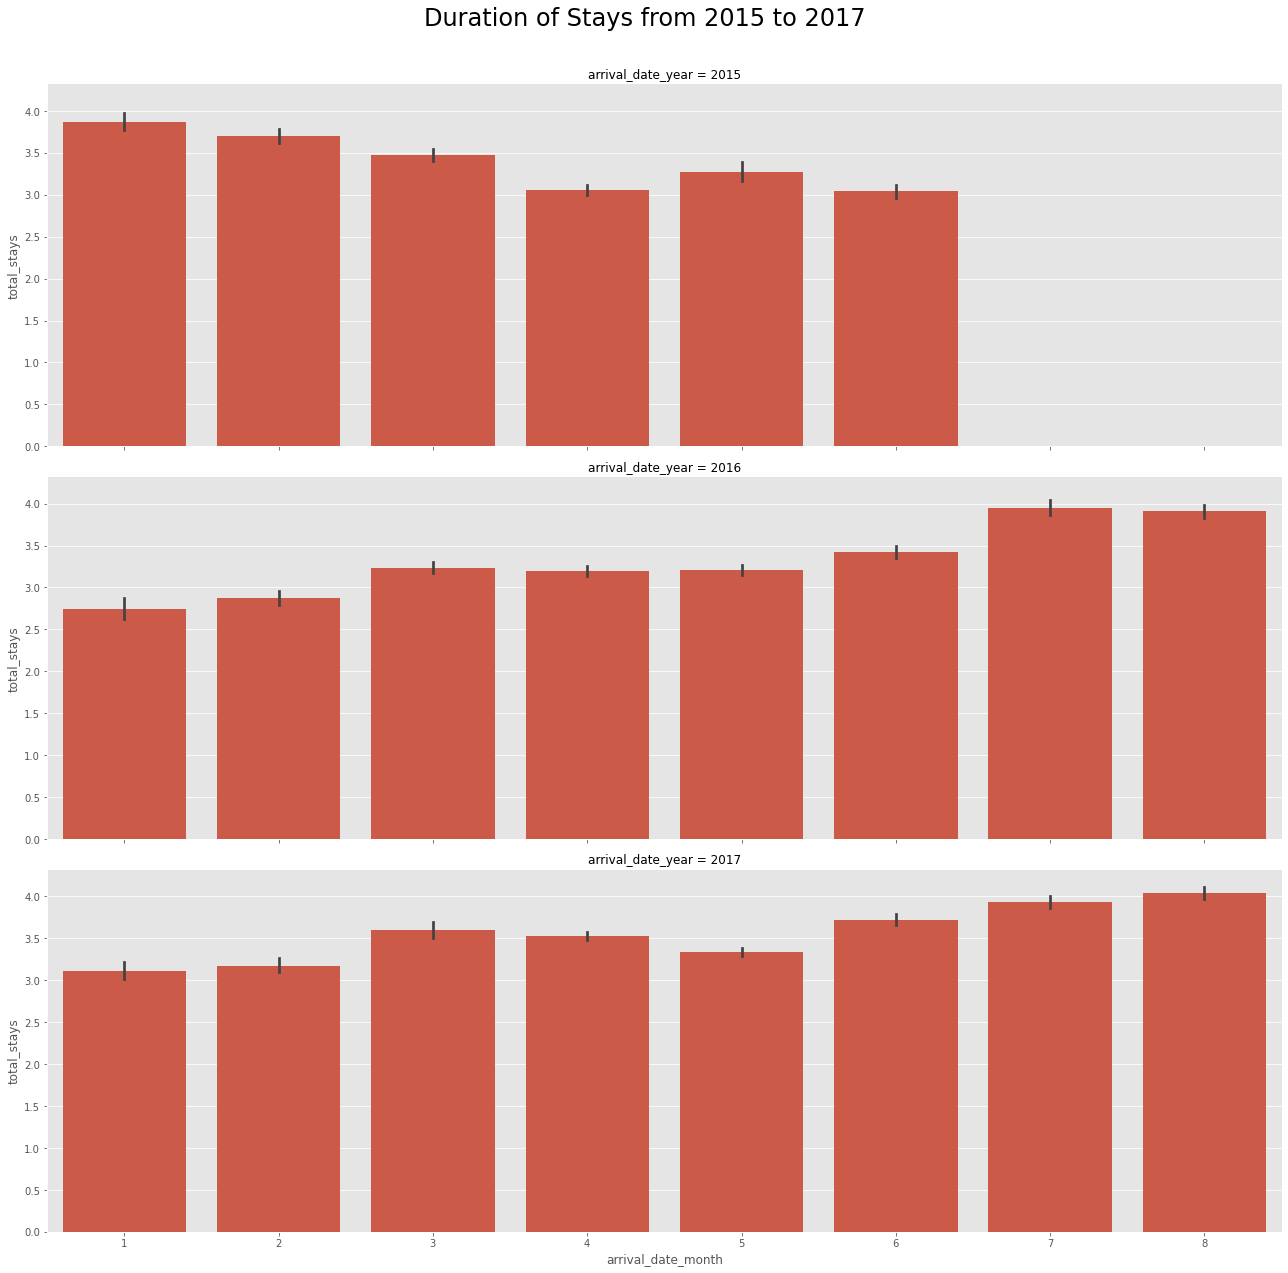

In [126]:
hotel_bookings_transform["total_stays"] = hotel_bookings_transform.stays_in_week_nights + hotel_bookings_transform.stays_in_weekend_nights
g = sns.FacetGrid(hotel_bookings_transform, row="arrival_date_year", height=6, aspect=3)
g.map(sns.barplot, "arrival_date_month", "total_stays")
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Duration of Stays from 2015 to 2017", fontsize=24)

We then calculate the total stays by summing up the stays in weekends and weeks to get the total stays of the guests. We apply average booking prices and average duration of stays for each months over the year. 

In [100]:
df2 = hotel_bookings_transform[["arrival_date_year", "arrival_date_month"]].copy()
df2.columns = ["year", "month"]
df2
hotel_bookings_transform['booking_date_noDate']=pd.to_datetime(df2['year'].astype(str)  + df2['month'].astype(str), format='%Y%m')

Text(0.5, 1.0, 'Timeseries of Average ADR')

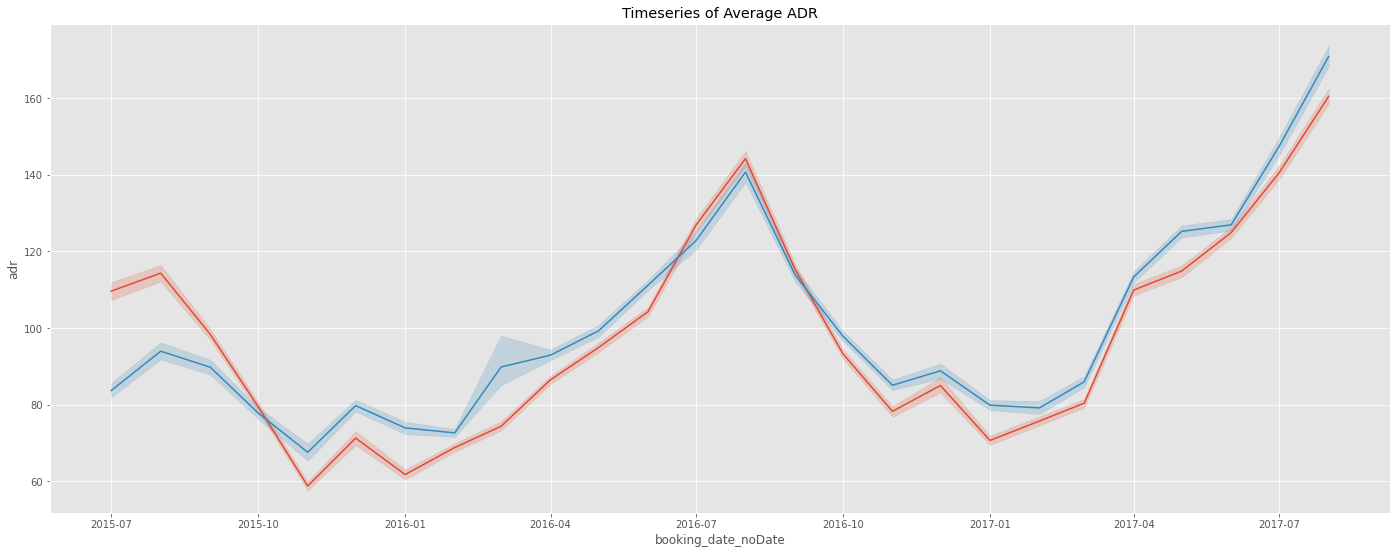

In [101]:
plt.figure(figsize=(24, 9))
sns.lineplot(data=hotel_bookings_transform[hotel_bookings_transform["is_canceled"] == 0], x="booking_date_noDate", y='adr', estimator=mean)
sns.lineplot(data=hotel_bookings_transform[hotel_bookings_transform["is_canceled"] == 1], x="booking_date_noDate", y='adr', estimator=mean)
plt.title("Timeseries of Average ADR")

C:\Users\Chris\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Average ADR from 2015 to 2017')

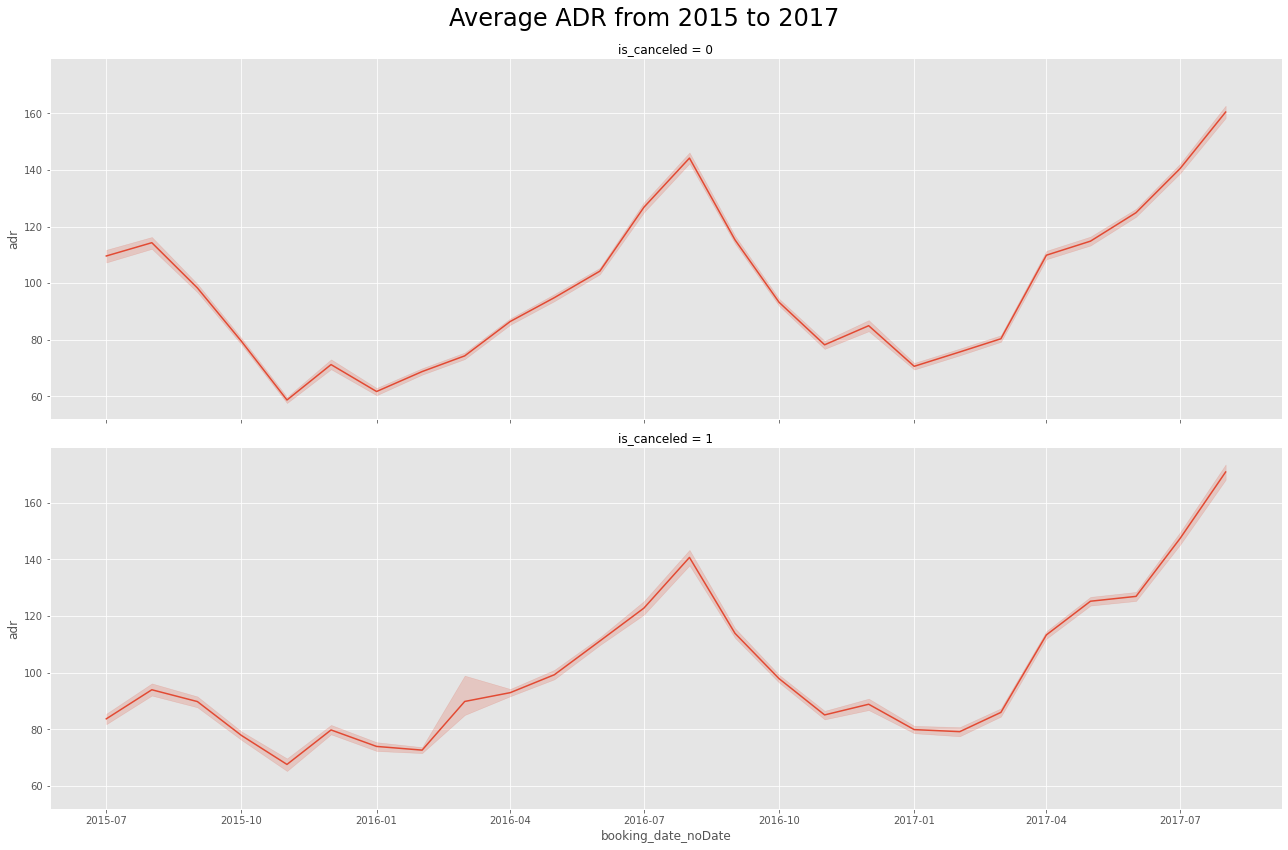

In [102]:
g = sns.FacetGrid(hotel_bookings_transform, row="is_canceled", size=6, aspect=3)
g.map(sns.lineplot, "booking_date_noDate", "adr")
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Average ADR from 2015 to 2017", fontsize=24)

Text(0.5, 1.0, 'Number of cancellation over time from 2015 to 2017')

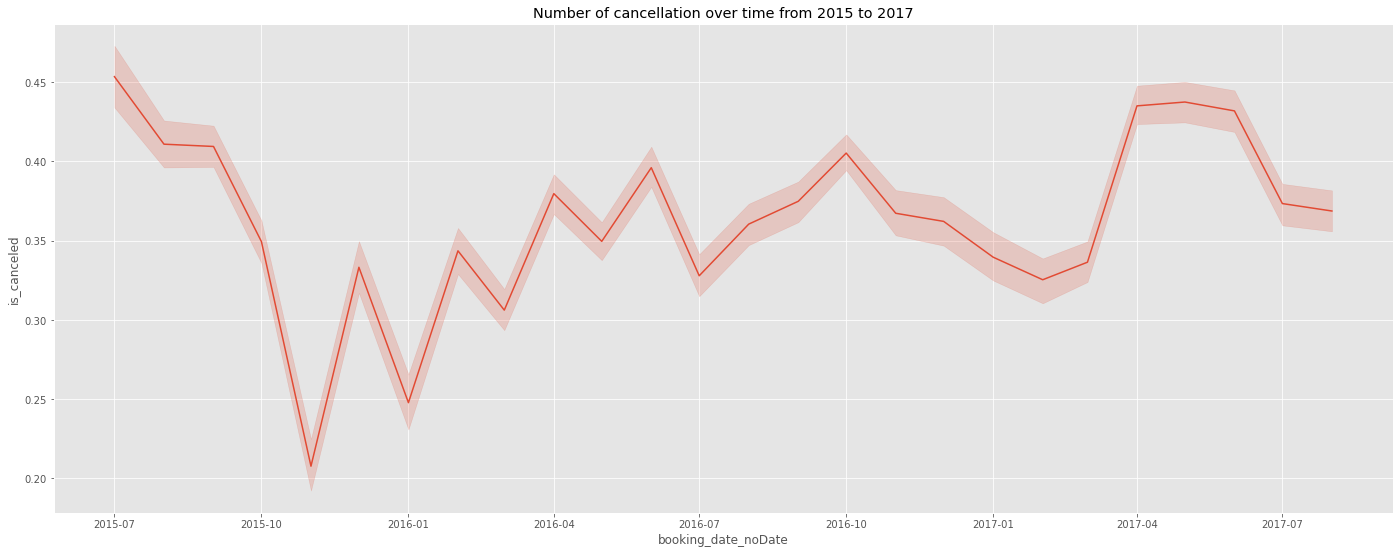

In [103]:
plt.figure(figsize=(24, 9))
sns.lineplot(data=hotel_bookings_transform, x="booking_date_noDate", y="is_canceled", estimator=mean)
plt.title("Number of cancellation over time from 2015 to 2017")

Text(0.5, 1.0, 'Number of guests over time from 2015 to 2017')

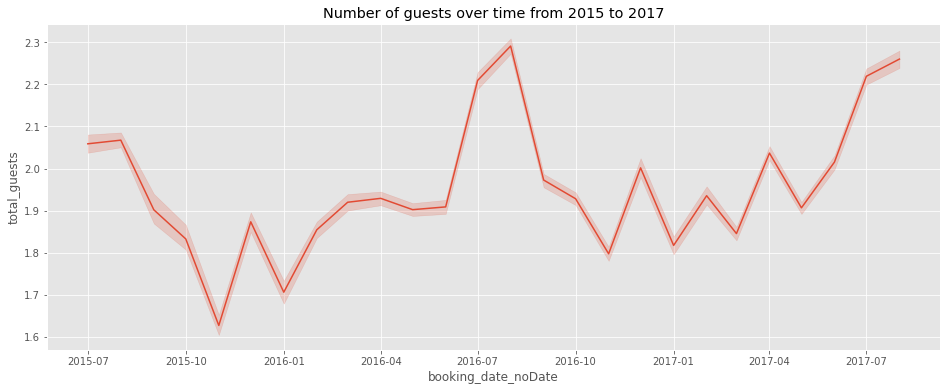

In [104]:
plt.figure(figsize=(16,6))
sns.lineplot(data=hotel_bookings_transform, x="booking_date_noDate", y='total_guests', estimator=mean)
plt.title("Number of guests over time from 2015 to 2017")

Text(0.5, 1.0, 'Average Duration of Stays over year from 2015 to 2017')

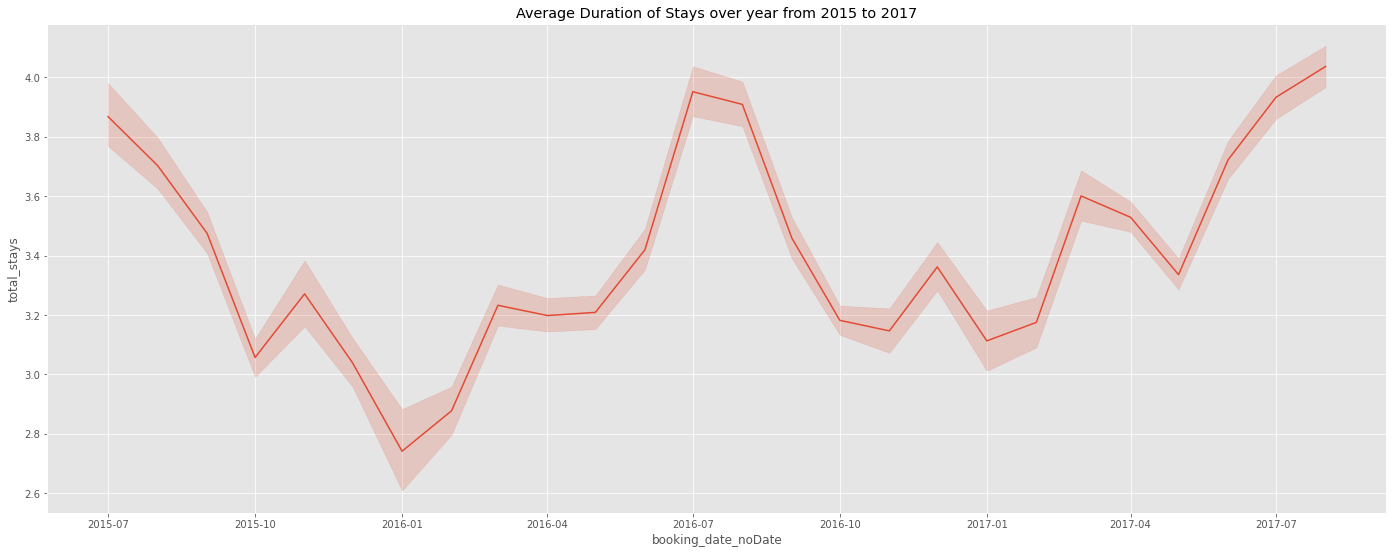

In [105]:
plt.figure(figsize=(24, 9))
sns.lineplot(data=hotel_bookings_transform, x="booking_date_noDate", y='total_stays', estimator=mean)
plt.title("Average Duration of Stays over year from 2015 to 2017")

Text(0.5, 1.0, 'Average ADR of week stays')

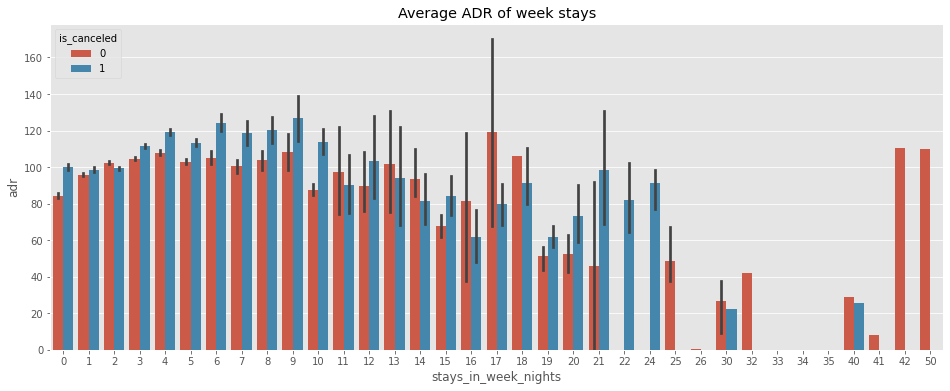

In [106]:
plt.figure(figsize=(16, 6))
sns.barplot(data=hotel_bookings_transform, x='stays_in_week_nights', y="adr", estimator=mean, hue="is_canceled")
plt.title("Average ADR of week stays")

Text(0.5, 1.0, 'Average ADR of weekend stays')

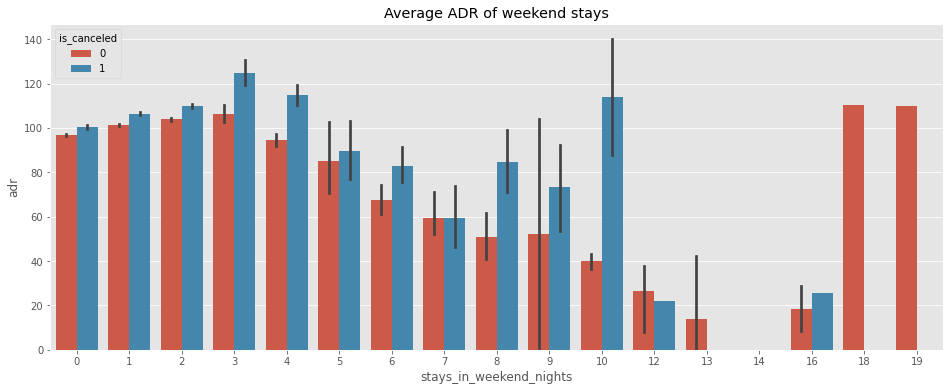

In [107]:
plt.figure(figsize=(16, 6))
sns.barplot(data=hotel_bookings_transform, x='stays_in_weekend_nights', y="adr", estimator=mean, hue="is_canceled")
plt.title("Average ADR of weekend stays")

### Deposit Type Analysis

Text(0.5, 1.0, 'Number of cancellation by deposit type')

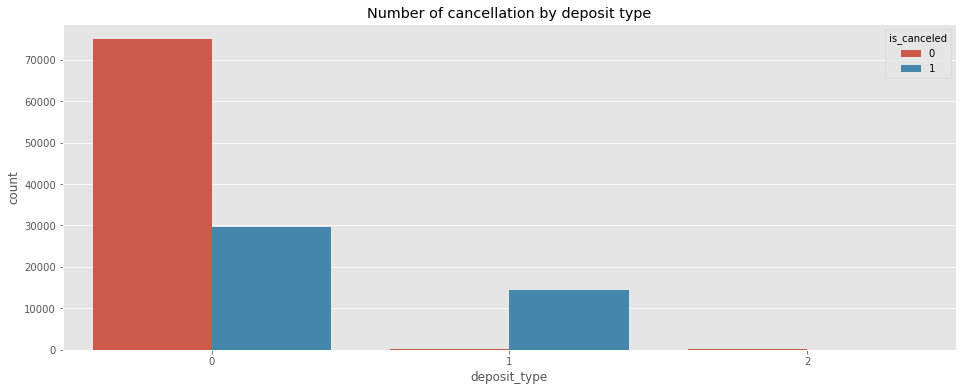

In [169]:
plt.figure(figsize=(16, 6))
sns.countplot(data=hotel_bookings_transform, x='deposit_type', hue="is_canceled")
plt.title("Number of cancellation by deposit type")

Text(0.5, 1.0, 'Number of cancellation by deposit type')

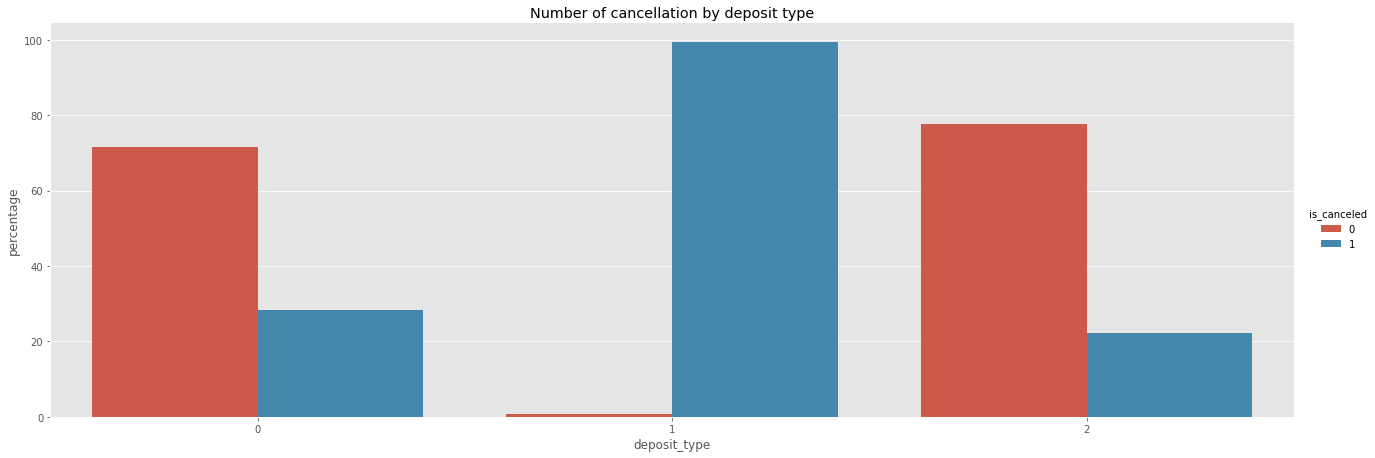

In [170]:
(hotel_bookings_transform
.groupby('deposit_type')['is_canceled']
.value_counts(normalize=True)
.mul(100)
.rename('percentage')
.reset_index()
.pipe((sns.catplot,'data'), x='deposit_type',y='percentage',hue='is_canceled',kind='bar', height=6, aspect=3))
plt.title("Percentage of cancellation by deposit type")

Text(0.5, 1.0, 'ADR groups by deposit type')

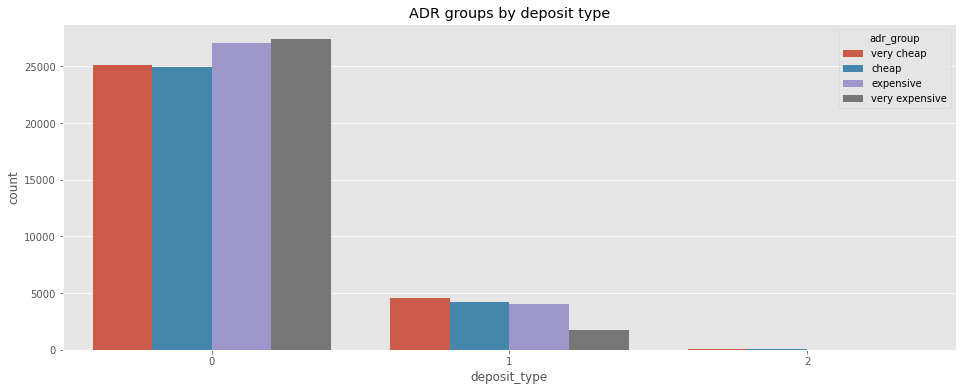

In [109]:
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings_transform, x="deposit_type", hue="adr_group")
plt.title("ADR groups by deposit type")

Text(0.5, 1.0, 'Percentage of ADR Group by deposit type')

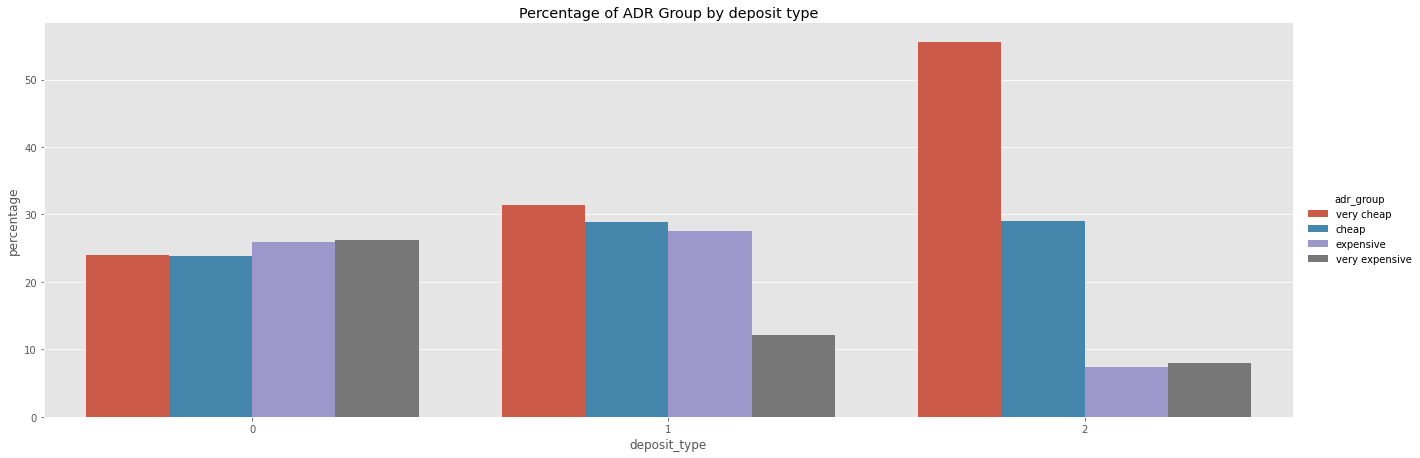

In [171]:
(hotel_bookings_transform
.groupby('deposit_type')['adr_group']
.value_counts(normalize=True)
.mul(100)
.rename('percentage')
.reset_index()
.pipe((sns.catplot,'data'), x='deposit_type',y='percentage',hue='adr_group',kind='bar', height=6, aspect=3))
plt.title("Percentage of ADR Group by deposit type")

## Identify and Explain Interesting Relationships

#Todo write relationships between logistic relationship and is_canceled..


- Stays_in_week_nights and Stays_in_weekend_nights are highly correlated : The more days you stay during the week, the more likely you will likely spend the weekend as well
- ADR and children, adults are also correlated. The higher the number of people are staying, the higher the rates go up. 
- Days in waiting_list and lead_time are correlated as customers always have to wait on their booking to be confirmed and take an action on whether to show up or not from then on.



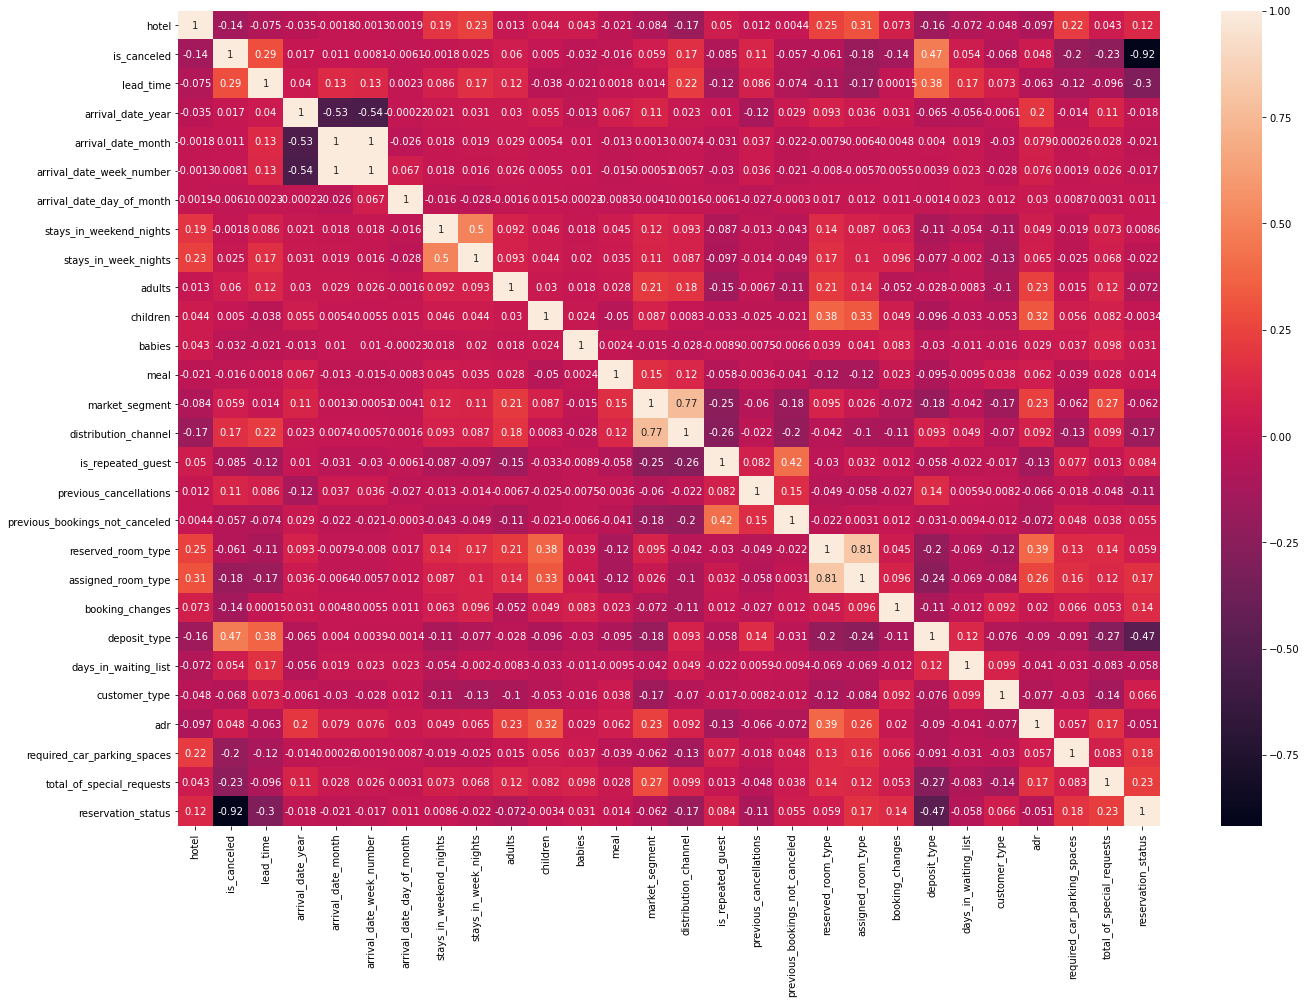

In [55]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(hotel_bookings_transform.corr(), annot=True, ax=ax);

In [58]:
import statsmodels.api as sm

log_reg = sm.Logit(hotel_bookings_transform['is_canceled'], sm.add_constant(hotel_bookings_transform[['hotel']
                                                                                 +['arrival_date_year']
                                                                                 +['lead_time']
                                                                                 +['market_segment']
                                                                                 +['meal']
                                                                                 +['arrival_date_week_number']
                                                                                 +['stays_in_weekend_nights']
                                                                                 +['arrival_date_day_of_month']
                                                                                 +['stays_in_week_nights']
                                                                                 +['adults']+['babies']
                                                                                 +['is_repeated_guest']
                                                                                 +['previous_cancellations']
                                                                                 +['previous_bookings_not_canceled']
                                                                                 +['booking_changes']
                                                                                +['days_in_waiting_list']
                                                                                 +['adr']
                                                                                 +['required_car_parking_spaces']
                                                                                 +['total_of_special_requests']
                                                                                ])).fit()

log_reg.summary2()
#hotel_bookings.info()





/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.515946
         Iterations 19


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                                                      Results: Logit
==========================================================================================================================================================================================
Model:                                                      Logit                                                    Pseudo R-squared:                                         0.217      
Dependent Variable:                                         is_canceled                                              AIC:                                                      123237.6621
Date:                                                       2021-01-24 18:43                                         BIC:                                                      123431.4651
No. Observations:                                           119390                                                   Log-Likelihood:                                           -61599.    
Df Model:                                                   19                                                       LL-Null:                                                  -78699.    
Df Residuals:                                               119370                                                   LLR p-value:                                              0.0000     
Converged:                                                  1.0000                                                   Scale:                                                    1.0000     
No. Iterations:                                             19.0000                                                                                                                       
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                 Coef.                    Std.Err.                     z     P>|z|                     [0.025                                     0.975]                  
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                          -418.4813                                    26.5902 -15.7382 0.0000                                   -470.5971                                  -366.3654
hotel                            -0.1808                                     0.0162 -11.1504 0.0000                                     -0.2126                                    -0.1491
arrival_date_year                 0.2065                                     0.0132  15.6615 0.0000                                      0.1807                                     0.2324
lead_time                         0.0047                                     0.0001  63.4022 0.0000                                      0.0046                                     0.0049
market_segment                    0.2060                                     0.0068  30.2071 0.0000                                      0.1926                                     0.2193
meal                             -0.0697                                     0.0066 -10.6392 0.0000                                     -0.0826                                    -0.0569
arrival_date_week_number         -0.0023                                     0.0007  -3.4441 0.0006                                     -0.0036                                    -0.0010
stays_in_weekend_nights          -0.0196                                     0.0080  -2.4553 0.0141                                     -0.0353                                    -0.0040
arrival_date_day_of_month        -0.0006                                     0.0008  -0.7184 0.4725           

## Exceptional work - Dimensionality reduction using Factor analysis of mixed data (FAMD)
### This technique is useful for a datset that contains both categorical and numerical features. 

    Standardization of the both categorical and numeric variables is very important for FAMD. This is automatically done by the package “prince”. 

    We deleted the following three features “country”,”agent” and ”company” due to errors while fitting FADM and ran the analysis on the rest of the features except the target feature “is_canceled”. 

    Here explained inertia means the same as the “explained variance”. Unfortunately, the resulting numbers of the first two components were very low.  This most likely has to do with scaling categorical variables and fitting them with numerical variables. We will keep investigating the cause of this error and resolve the issue.

In [81]:
import pandas as pd
import prince
import pprint
from prince import FAMD

In [2]:
# Encoding some features
hotel_bookings["is_canceled"]=hotel_bookings["is_canceled"].astype(str)
hotel_bookings["is_repeated_guest"]=hotel_bookings["is_repeated_guest"].astype(str)
hotel_bookings["distribution_channel"]=hotel_bookings["distribution_channel"].astype(str)
hotel_bookings["previous_cancellations"]=hotel_bookings["previous_cancellations"].astype(str)
hotel_bookings["reserved_room_type"]=hotel_bookings["reserved_room_type"].astype(str)
hotel_bookings["deposit_type"]=hotel_bookings["deposit_type"].astype(str)
hotel_bookings["market_segment"]=hotel_bookings["market_segment"].astype(str)
hotel_bookings["meal"]=hotel_bookings["meal"].astype(str)
hotel_bookings["assigned_room_type"]=hotel_bookings["assigned_room_type"].astype(str)
hotel_bookings["customer_type"]=hotel_bookings["customer_type"].astype(str)
hotel_bookings["reservation_status"]=hotel_bookings["reservation_status"].astype(str)
hotel_bookings["booking_date"]=hotel_bookings["booking_date"].astype(str)

NameError: name 'hotel_bookings' is not defined

In [3]:
# Turning all the categorical features into object features for FAMD processing

hotel_bookings.loc[:, hotel_bookings.dtypes == 'category'] =\
    hotel_bookings.select_dtypes(['category'])\
    .apply(lambda x: x.astype('object'))

hotel_bookings.info()

NameError: name 'hotel_bookings' is not defined

In [89]:
# Instantiate FAMD object
famd = FAMD(n_components =29, n_iter = 5, random_state = 101)

In [90]:
# Fit FAMD to the data
famd = famd.fit(hotel_bookings.drop('is_canceled', axis=1)) # Exclude target variable "is_canceled"

ValueError: 1611525329.4333062 cannot be used to seed a numpy.random.RandomState instance

In [120]:
famd.transform(hotel_bookings)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.869116,0.431268,-0.643300,-0.780055,-1.336612,-1.564791,-0.109459,2.367367,-0.387781,0.731281,...,0.735685,-0.766643,-0.298309,0.538489,-0.730799,-0.342504,0.968145,-1.502846,1.673901,0.752604
1,-1.245325,1.109513,0.523128,-0.925203,-2.359286,-1.360837,0.498448,3.193176,-0.846847,1.134792,...,0.880211,-0.887263,-0.233552,0.495344,-0.690423,-0.201491,0.844795,-1.531594,1.760032,0.637577
2,-1.091016,-0.385743,-1.255455,0.050731,-0.056014,-0.973987,-1.264150,0.600640,0.118722,0.266824,...,-0.133875,-0.533989,0.023111,0.103123,-0.515529,-0.339607,0.336139,-0.283215,0.549473,0.349245
3,-1.585730,-0.766026,-1.285146,-0.133764,-0.116590,-0.394220,-1.389214,0.378196,-0.176613,0.127228,...,0.586937,-0.068769,-0.005744,-0.761285,0.175665,0.051530,0.706974,-0.111945,-0.136926,-0.620822
4,-0.421421,0.182335,-0.794162,0.230975,0.946249,-0.054409,-1.190175,0.847059,-0.041608,-0.294540,...,0.219992,-0.359373,-0.179099,-0.193506,0.429086,-0.541590,0.032235,-0.639827,0.440249,-0.197159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.511571,0.463788,0.560242,-0.735789,0.047515,0.236820,0.817300,-1.613239,0.073634,0.031637,...,-0.501158,0.117662,0.155557,0.181369,-1.285026,0.097917,0.205001,-0.584297,-0.870511,-0.308543
119386,2.473396,1.662603,0.601066,0.020568,0.536949,1.417601,1.495278,-0.974992,0.212453,-0.124654,...,-0.116134,0.412236,-0.276637,-0.793753,0.196729,0.670320,0.719039,0.065525,-0.247280,-0.391944
119387,2.445347,1.143243,-0.120839,-0.552304,1.065184,1.631095,1.772240,-0.963506,-0.809862,-0.756176,...,0.110821,-0.146815,0.184424,0.041020,-0.960506,0.200182,0.649455,-0.042900,-0.800131,0.048108
119388,0.616648,0.656576,0.819311,-0.595273,-0.096506,0.459082,0.990757,-1.511782,-0.118448,0.114514,...,-0.410855,0.192773,0.212269,-0.085116,-0.712675,0.324942,0.446667,-0.224722,-0.484638,-0.226295


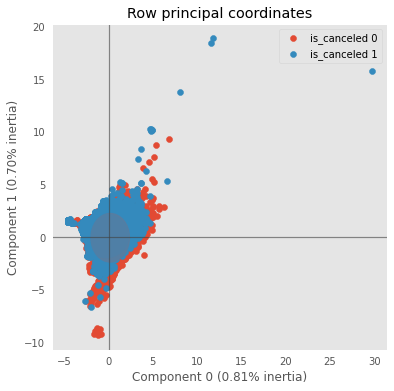

In [121]:
# FAMD plot
ax = famd.plot_row_coordinates(hotel_bookings,color_labels=['is_canceled {}'.format(t) for t in hotel_bookings['is_canceled']] )

In [24]:
# Principal dimensions results
pp = pprint.PrettyPrinter()
pp.pprint(famd.explained_inertia_) 

array([0.00808187, 0.00701121, 0.00619207, 0.00513764, 0.00431376,
       0.00401462, 0.00389843, 0.00373764, 0.00354492, 0.00335319,
       0.00323359, 0.00293884, 0.00277302, 0.00224314, 0.00210206,
       0.00194648, 0.00182217, 0.00173634, 0.00164255, 0.0015986 ,
       0.00153397, 0.00149931, 0.00149216, 0.00147228, 0.00142579,
       0.00141042, 0.00132989, 0.00131714, 0.00130547])


### Unfortunately, the first two major components failed to account more than 85%. All 29 features showed very low variance explanation. We will revisit this topic on the next lab assignment. 

In [111]:
corr = hotel_bookings_transform.corr()
corr.style.background_gradient(cmap='coolwarm')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,total_stays
hotel,1.000000,-0.136531,-0.075381,-0.035267,-0.001817,-0.001270,0.001862,0.186596,0.234020,0.013183,0.044210,0.043434,-0.021462,-0.083787,-0.174414,0.050421,0.012292,0.004441,0.249677,0.307834,0.072820,-0.159021,-0.072432,-0.047531,-0.096719,0.218873,0.043390,0.124331,0.040821,0.247479
is_canceled,-0.136531,1.000000,0.293123,0.016660,0.011022,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005036,-0.032491,-0.015693,0.059322,0.167567,-0.084793,0.110133,-0.057358,-0.061282,-0.176028,-0.144381,0.468634,0.054186,-0.068140,0.047557,-0.195498,-0.234658,-0.917196,0.046522,0.017779
lead_time,-0.075381,0.293123,1.000000,0.040142,0.131424,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037613,-0.020915,0.001825,0.013809,0.220459,-0.124410,0.086042,-0.073548,-0.106089,-0.172219,0.000149,0.375667,0.170084,0.073403,-0.063077,-0.116451,-0.095712,-0.302175,0.072265,0.157167
arrival_date_year,-0.035267,0.016660,0.040142,1.000000,-0.527739,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054636,-0.013192,0.066889,0.107720,0.022720,0.010341,-0.119822,0.029218,0.092809,0.036141,0.030872,-0.064714,-0.056497,-0.006149,0.197580,-0.013684,0.108531,-0.017683,0.052127,0.031438
arrival_date_month,-0.001817,0.011022,0.131424,-0.527739,1.000000,0.995105,-0.026063,0.018440,0.019212,0.028534,0.005437,0.010172,-0.012877,0.001287,0.007363,-0.030729,0.037479,-0.021640,-0.007923,-0.006378,0.004809,0.004048,0.019045,-0.029753,0.079315,0.000257,0.028026,-0.021090,0.027252,0.021536
arrival_date_week_number,-0.001270,0.008148,0.126871,-0.540561,0.995105,1.000000,0.066809,0.018208,0.015558,0.025909,0.005515,0.010395,-0.015244,-0.000515,0.005685,-0.030131,0.035501,-0.020904,-0.007997,-0.005684,0.005508,0.003891,0.022933,-0.028432,0.075791,0.001920,0.026149,-0.017387,0.025220,0.018719
arrival_date_day_of_month,0.001862,-0.006130,0.002268,-0.000221,-0.026063,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014553,-0.000230,-0.008335,-0.004070,0.001628,-0.006145,-0.027011,-0.000300,0.016929,0.011646,0.010613,-0.001358,0.022728,0.012188,0.030245,0.008683,0.003062,0.011460,0.006742,-0.027408
stays_in_weekend_nights,0.186596,-0.001791,0.085671,0.021497,0.018440,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045794,0.018483,0.044847,0.115357,0.093098,-0.087239,-0.012775,-0.042715,0.142083,0.086643,0.063281,-0.111435,-0.054151,-0.109220,0.049342,-0.018554,0.072671,0.008558,0.101426,0.762790
stays_in_week_nights,0.234020,0.024765,0.165799,0.030883,0.019212,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,0.034668,0.108581,0.087192,-0.097245,-0.013992,-0.048743,0.168616,0.100795,0.096209,-0.076788,-0.002020,-0.127223,0.065237,-0.024859,0.068192,-0.021607,0.101665,0.941005
adults,0.013183,0.060017,0.119519,0.029635,0.028534,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030440,0.018146,0.027549,0.208398,0.178959,-0.146426,-0.006738,-0.107983,0.211434,0.144779,-0.051673,-0.027644,-0.008283,-0.101756,0.230641,0.014785,0.122884,-0.071802,0.821105,0.105249
